In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
df_previous= pd.read_csv("previous_application.csv")
df_application= pd.read_csv("application_data.csv")
df_previous.shape, df_application.shape

((1670214, 37), (307511, 122))

In [3]:
set(df_application.columns).intersection(set(df_previous.columns))

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'SK_ID_CURR',
 'WEEKDAY_APPR_PROCESS_START'}

In [4]:
#df_previous.columns= 
renamed_cols= {col: col+'_PREV' for col in df_previous}
df_previous.rename(columns= renamed_cols, inplace = True)

In [5]:
set(df_application.columns).intersection(set(df_previous.columns))
df_previous.rename(columns={'SK_ID_CURR_PREV': 'SK_ID_CURR'}, inplace= True)
set(df_application.columns).intersection(set(df_previous.columns))

{'SK_ID_CURR'}

In [6]:
df= pd.merge(df_application, df_previous, on="SK_ID_CURR", how = 'left')

<b>Sepearting columns names with category and number after removing columns with high nan <b>

In [7]:
#finding all columns more than 40% nan 
high_null_cols= list((df.isnull().sum()/df.shape[0])[(df.isnull().sum()/df.shape[0])>0.4].index)

In [8]:
df.shape

(1430155, 158)

In [9]:
df.drop(high_null_cols, axis= 1, inplace= True)
df.shape

(1430155, 98)

<h2> Handling Imbalanced Data </h2>
Undersampling the other cases when TARGET==0

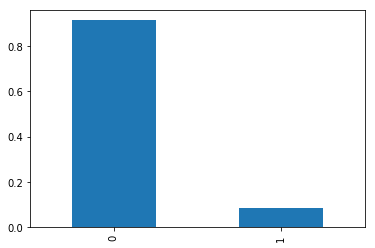

In [10]:
df.TARGET.value_counts(normalize=True).plot.bar()
plt.show()

In [11]:
?plt.pie

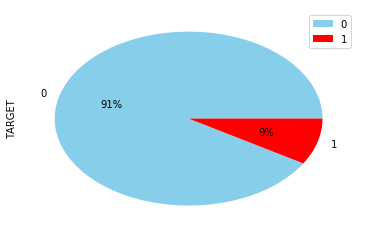

In [12]:
colors = ['skyblue', 'red']
df.TARGET.value_counts(normalize=True).plot(
    kind='pie', y='Target_variable', autopct='%1.0f%%', colors= colors)
plt.legend()
plt.show()

In [13]:

print("Overall default data percentage ",df[df.TARGET==1].shape[0]*100/df.shape[0])
print("Other cases data percentage",df[df.TARGET==0].shape[0]*100/df.shape[0])

Overall default data percentage  8.624240029926826
Other cases data percentage 91.37575997007318


In [14]:
numeric_col = df.select_dtypes(include='number').columns

category_col = df.select_dtypes(exclude='number').columns
len(category_col), len(numeric_col)

(27, 71)

In [15]:
possible_flag_cols= [col for col in df if df[col].nunique() <=3] # 3 considering nan 

possible_flag_cols

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_LAST_APPL_PER_CONTRACT_PREV',
 'NFLAG_LAST_APPL_IN_DAY_PREV',
 'NAME_PRODUCT_TYPE_PREV']

In [16]:
def get_groupby_target_info(df, cols):
    for col in cols:
        print(col, "NaN percentage", df[col].isnull().sum()/df.shape[0])
        display(df.groupby(col).TARGET.agg(['mean', 'count']))
        
get_groupby_target_info(df, possible_flag_cols)

TARGET NaN percentage 0.0


,mean,count
TARGET,,
0,0,1306815
1,1,123340


NAME_CONTRACT_TYPE NaN percentage 0.0


,mean,count
NAME_CONTRACT_TYPE,,
Cash loans,0.088882,1320679
Revolving loans,0.054405,109476


CODE_GENDER NaN percentage 0.0


,mean,count
CODE_GENDER,,
F,0.076037,964822
M,0.107415,465278
XNA,0.000000,55


FLAG_OWN_CAR NaN percentage 0.0


,mean,count
FLAG_OWN_CAR,,
N,0.089234,947544
Y,0.080369,482611


FLAG_OWN_REALTY NaN percentage 0.0


,mean,count
FLAG_OWN_REALTY,,
N,0.089216,398483
Y,0.085094,1031672


FLAG_MOBIL NaN percentage 0.0


,mean,count
FLAG_MOBIL,,
0,0.000000,1
1,0.086242,1430154


FLAG_EMP_PHONE NaN percentage 0.0


,mean,count
FLAG_EMP_PHONE,,
0,0.058512,276424
1,0.092886,1153731


FLAG_WORK_PHONE NaN percentage 0.0


,mean,count
FLAG_WORK_PHONE,,
0,0.082490,1169190
1,0.103056,260965


FLAG_CONT_MOBILE NaN percentage 0.0


,mean,count
FLAG_CONT_MOBILE,,
0,0.084605,1442
1,0.086244,1428713


FLAG_PHONE NaN percentage 0.0


,mean,count
FLAG_PHONE,,
0,0.089996,1026023
1,0.076713,404132


FLAG_EMAIL NaN percentage 0.0


,mean,count
FLAG_EMAIL,,
0,0.086069,1327244
1,0.088475,102911


REGION_RATING_CLIENT NaN percentage 0.0


,mean,count
REGION_RATING_CLIENT,,
1,0.053408,136982
2,0.084015,1072986
3,0.117523,220187


REGION_RATING_CLIENT_W_CITY NaN percentage 0.0


,mean,count
REGION_RATING_CLIENT_W_CITY,,
1,0.053350,146166
2,0.084277,1086086
3,0.121322,197903


REG_REGION_NOT_LIVE_REGION NaN percentage 0.0


,mean,count
REG_REGION_NOT_LIVE_REGION,,
0,0.086148,1412573
1,0.093789,17582


REG_REGION_NOT_WORK_REGION NaN percentage 0.0


,mean,count
REG_REGION_NOT_WORK_REGION,,
0,0.085844,1366714
1,0.094828,63441


LIVE_REGION_NOT_WORK_REGION NaN percentage 0.0


,mean,count
LIVE_REGION_NOT_WORK_REGION,,
0,0.086031,1378297
1,0.091866,51858


REG_CITY_NOT_LIVE_CITY NaN percentage 0.0


,mean,count
REG_CITY_NOT_LIVE_CITY,,
0,0.083024,1324780
1,0.126709,105375


REG_CITY_NOT_WORK_CITY NaN percentage 0.0


,mean,count
REG_CITY_NOT_WORK_CITY,,
0,0.078837,1112639
1,0.112193,317516


LIVE_CITY_NOT_WORK_CITY NaN percentage 0.0


,mean,count
LIVE_CITY_NOT_WORK_CITY,,
0,0.082018,1181507
1,0.106315,248648


FLAG_DOCUMENT_2 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_2,,
0,0.086219,1430055
1,0.420000,100


FLAG_DOCUMENT_3 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_3,,
0,0.066312,377247
1,0.093383,1052908


FLAG_DOCUMENT_4 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_4,,
0,0.086249,1430047
1,0.000000,108


FLAG_DOCUMENT_5 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_5,,
0,0.086256,1410702
1,0.085282,19453


FLAG_DOCUMENT_6 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_6,,
0,0.089061,1301650
1,0.057694,128505


FLAG_DOCUMENT_7 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_7,,
0,0.086239,1429834
1,0.099688,321


FLAG_DOCUMENT_8 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_8,,
0,0.086849,1323329
1,0.078726,106826


FLAG_DOCUMENT_9 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_9,,
0,0.086318,1425576
1,0.062677,4579


FLAG_DOCUMENT_10 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_10,,
0,0.086247,1430076
1,0.000000,79


FLAG_DOCUMENT_11 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_11,,
0,0.086256,1427120
1,0.079736,3035


FLAG_DOCUMENT_12 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_12,,
0,0.086243,1430152
1,0.000000,3


FLAG_DOCUMENT_13 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_13,,
0,0.086354,1427136
1,0.033455,3019


FLAG_DOCUMENT_14 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_14,,
0,0.086325,1427672
1,0.038663,2483


FLAG_DOCUMENT_15 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_15,,
0,0.086283,1429070
1,0.033180,1085


FLAG_DOCUMENT_16 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_16,,
0,0.086536,1420338
1,0.043802,9817


FLAG_DOCUMENT_17 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_17,,
0,0.086255,1429923
1,0.008621,232


FLAG_DOCUMENT_18 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_18,,
0,0.086380,1423069
1,0.058566,7086


FLAG_DOCUMENT_19 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_19,,
0,0.086255,1429526
1,0.057234,629


FLAG_DOCUMENT_20 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_20,,
0,0.086227,1429571
1,0.123288,584


FLAG_DOCUMENT_21 NaN percentage 0.0


,mean,count
FLAG_DOCUMENT_21,,
0,0.086237,1429819
1,0.110119,336


FLAG_LAST_APPL_PER_CONTRACT_PREV NaN percentage 0.011505046655782065


,mean,count
FLAG_LAST_APPL_PER_CONTRACT_PREV,,
N,0.108149,7314
Y,0.086441,1406387


NFLAG_LAST_APPL_IN_DAY_PREV NaN percentage 0.011505046655782065


,mean,count
NFLAG_LAST_APPL_IN_DAY_PREV,,
0.0,0.100119,5044
1.0,0.086504,1408657


NAME_PRODUCT_TYPE_PREV NaN percentage 0.011505046655782065


,mean,count
NAME_PRODUCT_TYPE_PREV,,
XNA,0.083548,900053
walk-in,0.124690,128254
x-sell,0.080878,385394


In [17]:
?plt.bar

<Figure size 1152x432 with 0 Axes>

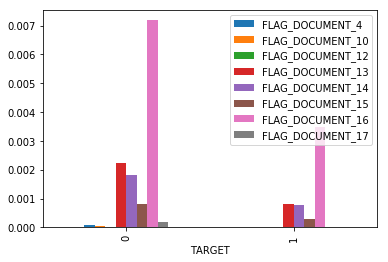

In [18]:
cols= ['FLAG_DOCUMENT_'+str(i) for i in [ 4, 10, 12, 13,14, 15, 16, 17]]
plt.figure(figsize=(16,6))
(df.groupby('TARGET')[cols].mean()).plot.bar()

<h2>Analysis report 1</h2>
Documents 2 to 21 is not clear on the content of the document, on analysis found those who did not submit the documents has higher chance of defaulters. 
The Above graph shows the defaulters (x axis 1) have not submitted as many documents as other cases. 
Some documents which are important among them are document  4, 10, 12, 13,14, 15, 16, 17 

In [19]:
df[df['FLAG_MOBIL']==0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_CLIENT_TYPE_PREV,NAME_GOODS_CATEGORY_PREV,NAME_PORTFOLIO_PREV,NAME_PRODUCT_TYPE_PREV,CHANNEL_TYPE_PREV,SELLERPLACE_AREA_PREV,NAME_SELLER_INDUSTRY_PREV,CNT_PAYMENT_PREV,NAME_YIELD_GROUP_PREV,PRODUCT_COMBINATION_PREV
72705,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Observation 1</b><br>

1. Own mobile, everyone owns mobile, there is only one record which has no mobile. and all defaulters are have mobile in data. So dropping mobile related columns. Providing Email or not does not give any useful information on defaulters in itself
2. NFLAG_LAST_APPL_IN_DAY_PREV FLAG_LAST_APPL_PER_CONTRACT_PREV does not show any variation with the target variable, so can remove it
3. Keeping other less correlation variable for bi-variant analysis.

In [20]:
print(df.shape)
df.drop(["FLAG_CONT_MOBILE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_PHONE"], axis= 1, inplace= True)
df.shape

(1430155, 98)


(1430155, 93)

In [21]:
df.groupby(by=["FLAG_OWN_REALTY", "FLAG_OWN_CAR"])['TARGET'].mean()

FLAG_OWN_REALTY  FLAG_OWN_CAR
N                N               0.095211
                 Y               0.077678
Y                N               0.086947
                 Y               0.081428
Name: TARGET, dtype: float64

In [22]:
print(df.shape)
df.drop(["NFLAG_LAST_APPL_IN_DAY_PREV", "FLAG_LAST_APPL_PER_CONTRACT_PREV"], axis= 1, inplace= True)
df.shape

(1430155, 93)


(1430155, 91)

In [23]:
def cat_plot(df, col, colour= 'g', normalise= True):
    plt.figure(figsize=[12,4])
    plt.subplot(1,2,1)
    if normalise:
        df[df.TARGET==1][col].value_counts(normalize=True).plot.bar(color=colour)
        plt.title("{} count for defaulters".format(col))
        plt.subplot(1,2,2)
        df[df.TARGET==0][col].value_counts(normalize=True).plot.bar(color=colour)
        plt.title("{} count for other cases".format(col))
        plt.show()
        
    else:
        (df[df.TARGET==1].groupby([col])[col].count()).plot.bar(color=colour)
        plt.title("{} count for defaulters".format(col))
        plt.subplot(1,2,2)
        (df[df.TARGET==0].groupby(col)[col].count()).plot.bar(color=colour)
        plt.title("{} count for other cases".format(col))
        plt.show()
    (df.groupby([col])["TARGET"].mean()).plot.bar()
    plt.title("{} vs target mean".format(col))
    plt.show()

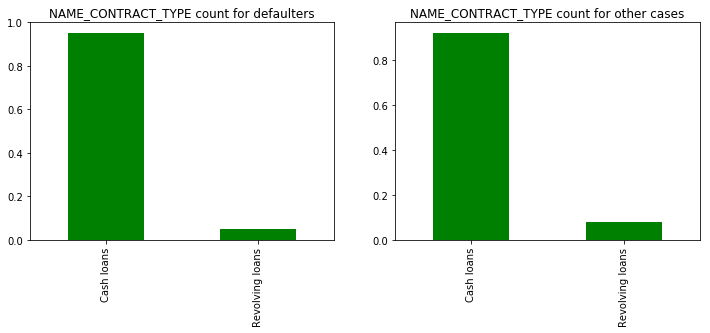

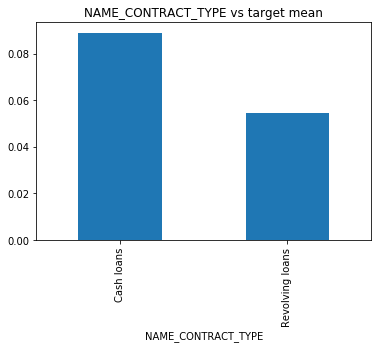

In [24]:

cat_plot(df,'NAME_CONTRACT_TYPE', 'g')

<b> Observation 2</b><br>
 Cash loans has more defaulters compared to that of revolving loans

<h2> Checking remaining category columns </h2>

In [25]:
remaning_cat_cols= list(set(category_col)- set(possible_flag_cols))

In [26]:

get_groupby_target_info(df, remaning_cat_cols)

NAME_SELLER_INDUSTRY_PREV NaN percentage 0.011505046655782065


,mean,count
NAME_SELLER_INDUSTRY_PREV,,
Auto technology,0.103676,4080
Clothing,0.057248,19896
Connectivity,0.092070,238350
Construction,0.065743,25417
Consumer electronics,0.075534,341701
Furniture,0.061165,48966
Industry,0.072131,16567
Jewelry,0.088752,2107
MLM partners,0.061889,921


ORGANIZATION_TYPE NaN percentage 0.0


,mean,count
ORGANIZATION_TYPE,,
Advertising,0.072928,1810
Agriculture,0.099282,10858
Bank,0.053578,10956
Business Entity Type 1,0.092734,25956
Business Entity Type 2,0.092352,47016
Business Entity Type 3,0.099162,308918
Cleaning,0.090563,1314
Construction,0.125249,30076
Culture,0.057905,1537


NAME_PORTFOLIO_PREV NaN percentage 0.011505046655782065


,mean,count
NAME_PORTFOLIO_PREV,,
Cards,0.101619,121985
Cars,0.055263,380
Cash,0.088765,391663
POS,0.076360,592460
XNA,0.097447,307213


OCCUPATION_TYPE NaN percentage 0.32355304145354874


,mean,count
OCCUPATION_TYPE,,
Accountants,0.056979,42612
Cleaning staff,0.092415,24455
Cooking staff,0.109085,28895
Core staff,0.068253,120171
Drivers,0.119979,84940
HR staff,0.073698,2361
High skill tech staff,0.069543,49351
IT staff,0.067749,1786
Laborers,0.111704,253761


NAME_FAMILY_STATUS NaN percentage 0.0


,mean,count
NAME_FAMILY_STATUS,,
Civil marriage,0.102903,144593
Married,0.083096,921040
Separated,0.084749,92332
Single / not married,0.100926,189881
Unknown,0.000000,2
Widow,0.059983,82307


CHANNEL_TYPE_PREV NaN percentage 0.011505046655782065


,mean,count
CHANNEL_TYPE_PREV,,
AP+ (Cash loan),0.128265,49624
Car dealer,0.051724,406
Channel of corporate sales,0.063751,5396
Contact center,0.102698,58891
Country-wide,0.082560,423062
Credit and cash offices,0.090110,600342
Regional / Local,0.076055,92472
Stone,0.073697,183508


PRODUCT_COMBINATION_PREV NaN percentage 0.011723904052357962


,mean,count
PRODUCT_COMBINATION_PREV,,
Card Street,0.112904,94594
Card X-Sell,0.093045,66774
Cash,0.095410,235101
Cash Street: high,0.113639,51699
Cash Street: low,0.101004,28593
Cash Street: middle,0.116156,29934
Cash X-Sell: high,0.114936,50802
Cash X-Sell: low,0.065832,110599
Cash X-Sell: middle,0.078360,120036


NAME_GOODS_CATEGORY_PREV NaN percentage 0.011505046655782065


,mean,count
NAME_GOODS_CATEGORY_PREV,,
Additional Service,0.064220,109
Animals,0.000000,1
Audio/Video,0.076618,85502
Auto Accessories,0.090719,6228
Clothing and Accessories,0.057019,19590
Computers,0.081047,89923
Construction Materials,0.069676,21356
Consumer Electronics,0.070669,104785
Direct Sales,0.081818,330


NAME_CONTRACT_STATUS_PREV NaN percentage 0.011505046655782065


,mean,count
NAME_CONTRACT_STATUS_PREV,,
Approved,0.075887,886099
Canceled,0.091736,259441
Refused,0.119964,245390
Unused offer,0.082517,22771


NAME_CLIENT_TYPE_PREV NaN percentage 0.011505046655782065


,mean,count
NAME_CLIENT_TYPE_PREV,,
New,0.089948,259540
Refreshed,0.073363,114936
Repeater,0.087146,1037682
XNA,0.099157,1543


NAME_CONTRACT_TYPE_PREV NaN percentage 0.011505046655782065


,mean,count
NAME_CONTRACT_TYPE_PREV,,
Cash loans,0.091258,626764
Consumer loans,0.077100,625256
Revolving loans,0.104686,161368
XNA,0.201278,313


NAME_CASH_LOAN_PURPOSE_PREV NaN percentage 0.011505046655782065


,mean,count
NAME_CASH_LOAN_PURPOSE_PREV,,
Building a house or an annex,0.138225,2344
Business development,0.128134,359
Buying a garage,0.060345,116
Buying a holiday home / land,0.118790,463
Buying a home,0.119829,701
Buying a new car,0.090293,886
Buying a used car,0.128797,2469
Car repairs,0.183792,691
Education,0.104948,1334


WEEKDAY_APPR_PROCESS_START_PREV NaN percentage 0.011505046655782065


,mean,count
WEEKDAY_APPR_PROCESS_START_PREV,,
FRIDAY,0.087504,213373
MONDAY,0.088607,214509
SATURDAY,0.083469,204159
SUNDAY,0.080548,140078
THURSDAY,0.088898,211005
TUESDAY,0.087674,215058
WEDNESDAY,0.086976,215519


NAME_TYPE_SUITE NaN percentage 0.0028185756089374927


,mean,count
NAME_TYPE_SUITE,,
Children,0.080335,14091
Family,0.080453,186208
Group of people,0.092382,1234
Other_A,0.080493,3081
Other_B,0.084985,6860
"Spouse, partner",0.088810,47371
Unaccompanied,0.087184,1167279


NAME_INCOME_TYPE NaN percentage 0.0


,mean,count
NAME_INCOME_TYPE,,
Businessman,0.000000,10
Commercial associate,0.080574,327563
Maternity leave,0.842105,19
Pensioner,0.058280,276323
State servant,0.063906,95468
Student,0.000000,30
Unemployed,0.519380,129
Working,0.102187,730613


NAME_EDUCATION_TYPE NaN percentage 0.0


,mean,count
NAME_EDUCATION_TYPE,,
Academic degree,0.016949,590
Higher education,0.060027,319692
Incomplete higher,0.089550,45751
Lower secondary,0.108671,17300
Secondary / secondary special,0.093772,1046822


NAME_HOUSING_TYPE NaN percentage 0.0


,mean,count
NAME_HOUSING_TYPE,,
Co-op apartment,0.084083,4448
House / apartment,0.083469,1279761
Municipal apartment,0.094410,51954
Office apartment,0.071694,11563
Rented apartment,0.124981,20035
With parents,0.126743,62394


CODE_REJECT_REASON_PREV NaN percentage 0.011505046655782065


,mean,count
CODE_REJECT_REASON_PREV,,
CLIENT,0.082517,22771
HC,0.117342,145984
LIMIT,0.125594,47773
SCO,0.099982,32636
SCOFR,0.209287,10875
SYSTEM,0.062500,672
VERIF,0.092563,3079
XAP,0.079477,1145533
XNA,0.100959,4378


WEEKDAY_APPR_PROCESS_START NaN percentage 0.0


,mean,count
WEEKDAY_APPR_PROCESS_START,,
FRIDAY,0.085766,233042
MONDAY,0.079807,237171
SATURDAY,0.086703,158714
SUNDAY,0.085043,77396
THURSDAY,0.085719,233146
TUESDAY,0.091676,251516
WEDNESDAY,0.087967,239170


NAME_YIELD_GROUP_PREV NaN percentage 0.011505046655782065


,mean,count
NAME_YIELD_GROUP_PREV,,
XNA,0.098633,429198
high,0.095452,306061
low_action,0.064514,78587
low_normal,0.071321,274884
middle,0.080432,324971


NAME_PAYMENT_TYPE_PREV NaN percentage 0.011505046655782065


,mean,count
NAME_PAYMENT_TYPE_PREV,,
Cash through the bank,0.080866,882700
Cashless from the account of the employer,0.080765,941
Non-cash from your account,0.082113,7100
XNA,0.096223,522960


In [27]:
?sns.countplot

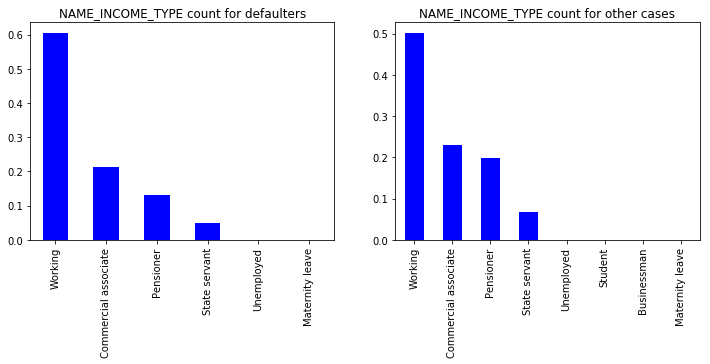

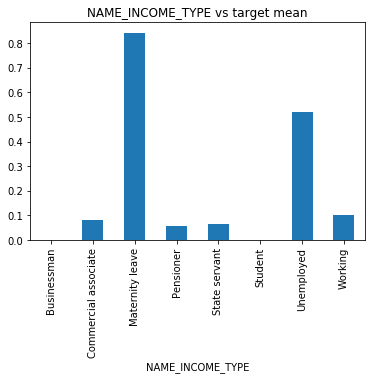

In [28]:
cat_plot(df, 'NAME_INCOME_TYPE', 'b')
#df.groupby('NAME_INCOME_TYPE').TARGET.mean()

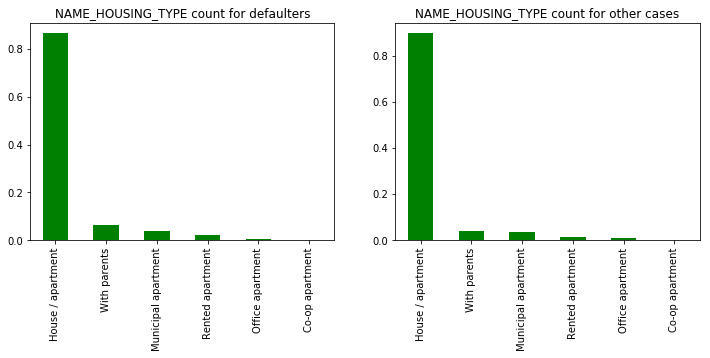

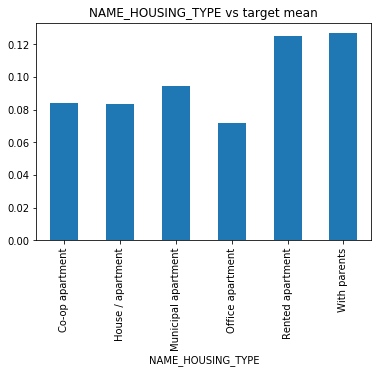

In [29]:
#display(df.groupby("NAME_HOUSING_TYPE")['TARGET'].mean())

cat_plot(df,'NAME_HOUSING_TYPE', 'g' )

<h3>Analysis report 2</h3>
1. Income type column, Maternity leave and Unemployed have high defaulters <br>
2. NAME_HOUSING_TYPE, Rentend apartments and people living with parents have increased deafult rates compared to other categories


<b>Observation 2</b><br>
NAME_YIELD_GROUP_PREV, as the interest rate increases there a slight increase in default rates have to analyse further.,
WEEKDAY_APPR_PROCESS_START, WEEKDAY_APPR_PROCESS_START_PREV, NAME_TYPE_SUITE,NAME_PAYMENT_TYPE_PREV columns show no connection with target, all categories have similar mean

In [30]:
print(df.shape)
df.drop(['WEEKDAY_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START_PREV', 'NAME_TYPE_SUITE','NAME_PAYMENT_TYPE_PREV'], axis= 1, inplace= True)
df.shape

(1430155, 91)


(1430155, 87)

In [31]:
pd.set_option('display.max_rows', 100)

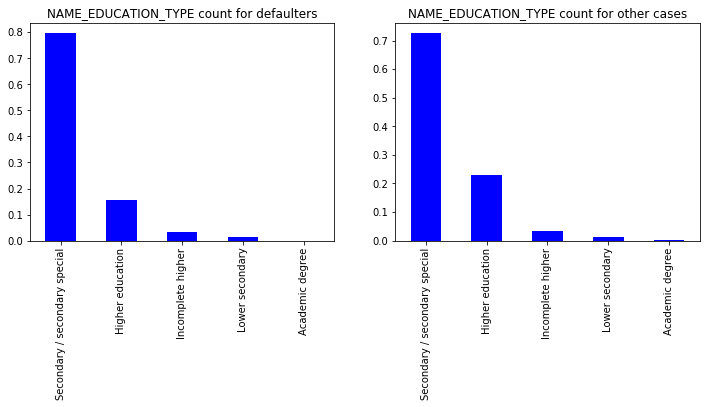

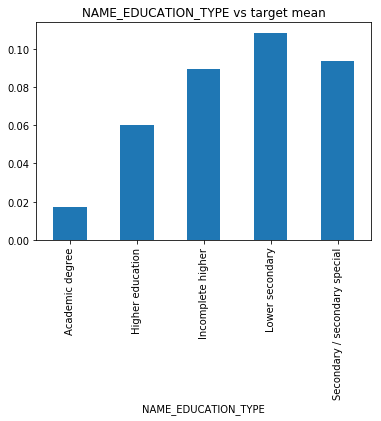

,mean,count
NAME_EDUCATION_TYPE,,
Academic degree,0.016949,590
Higher education,0.060027,319692
Incomplete higher,0.089550,45751
Lower secondary,0.108671,17300
Secondary / secondary special,0.093772,1046822


In [32]:
cat_plot(df, 'NAME_EDUCATION_TYPE', 'b')
df.groupby([ 'NAME_EDUCATION_TYPE'])['TARGET'].agg([ 'mean', 'count'])

<h3> Bi variant category analysis </h3>

In [33]:

df.groupby(['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'])['TARGET'].agg([ 'mean', 'count'])

mean   count
NAME_INCOME_TYPE     NAME_EDUCATION_TYPE                            
Businessman          Higher education               0.000000      10
Commercial associate Academic degree                0.020000     150
                     Higher education               0.057272  100748
                     Incomplete higher              0.080803   14393
                     Lower secondary                0.115599    2154
                     Secondary / secondary special  0.091415  210118
Maternity leave      Higher education               0.000000       3
                     Secondary / secondary special  1.000000      16
Pensioner            Academic degree                0.000000      89
                     Higher education               0.047406   37780
                     Incomplete higher              0.041356    2684
                     Lower secondary                0.066061    7039
                     Secondary / secondary special  0.060057  228731
State servant        Academic degree                0.000000      79
                     Higher education               0.043696   36411
                     Incomplete higher              0.068426    3449
                     Lower secondary                0.052752     436
                     Secondary / secondary special  0.077160   55093
Student              Higher education               0.000000       7
                     Incomplete higher              0.000000       1
                     Secondary / secondary special  0.000000      22
Unemployed           Higher education               0.000000       9
                     Incomplete higher              0.500000      14
                     Secondary / secondary special  0.566038     106
Working              Academic degree                0.025735     272
                     Higher education               0.069360  144724
                     Incomplete higher              0.102340   25210
                     Lower secondary                0.149003    7671
                     Secondary / secondary special  0.110163  552736

<h3> Analysis report 3</h3>
1. In general customers with education lower secondary and Secondary / secondary special have higher default rates. <br>
2. People in Maternity leave and with education 'Secondary / secondary special' have 100% default rate.

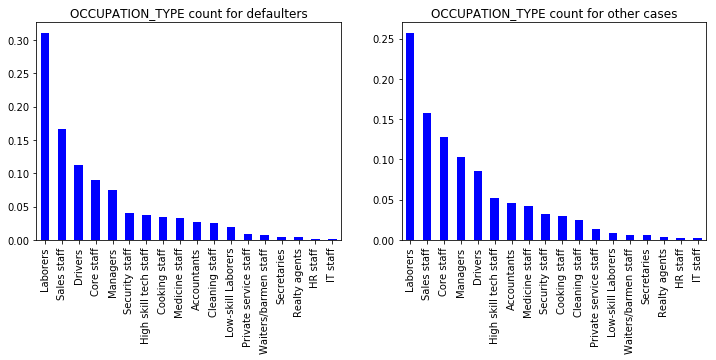

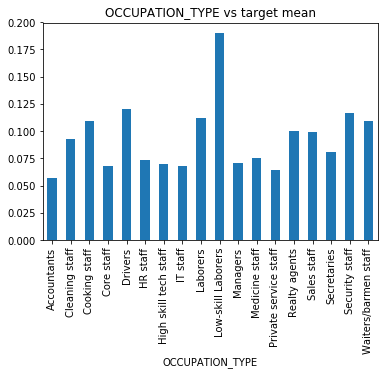

In [34]:

df.groupby(['OCCUPATION_TYPE'])['TARGET'].agg([ 'mean', 'count'])
cat_plot(df, 'OCCUPATION_TYPE','b')

<h3>Analysis report 4</h3>
Column Occupation type, low skill laborers have more default rate.

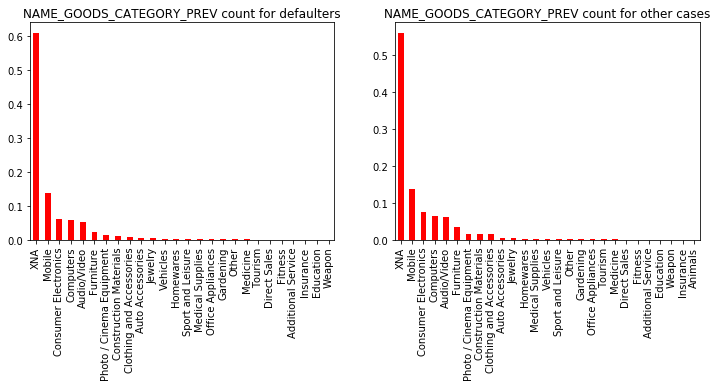

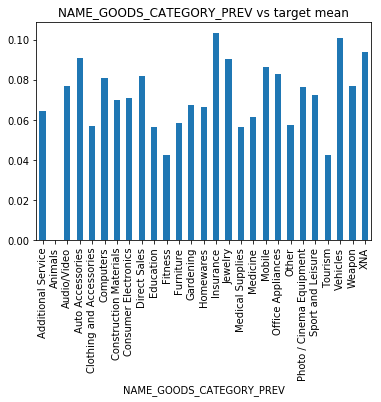

In [35]:
#NAME_GOODS_CATEGORY_PREV

df.groupby(['NAME_GOODS_CATEGORY_PREV'])['TARGET'].agg([ 'mean', 'count'])
cat_plot(df,'NAME_GOODS_CATEGORY_PREV', 'r' )

In [36]:

pd.set_option('display.max_rows', 100)

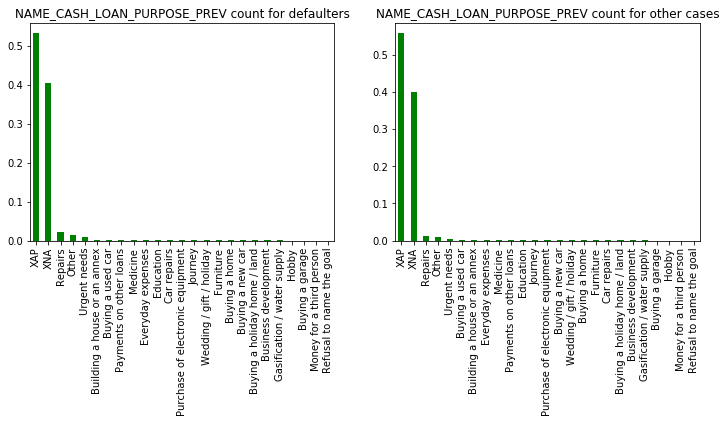

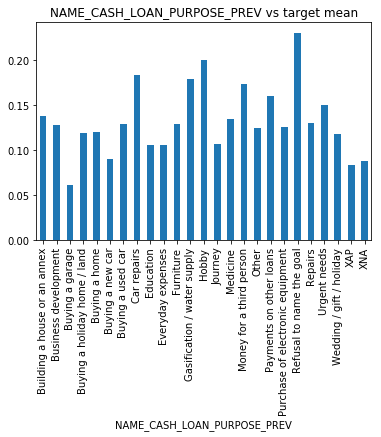

In [37]:
# df.groupby(['NAME_CASH_LOAN_PURPOSE_PREV' ])['TARGET'].agg([ 'mean']).plot.bar()
# plt.title("Cash loan purpose vs target mean")
# plt.show()
cat_plot(df, 'NAME_CASH_LOAN_PURPOSE_PREV')

In [38]:
df['NAME_CASH_LOAN_PURPOSE_PREV']= df.NAME_CASH_LOAN_PURPOSE_PREV.apply(lambda x: np.nan if x in ['XAP', 'XNA'] else x)

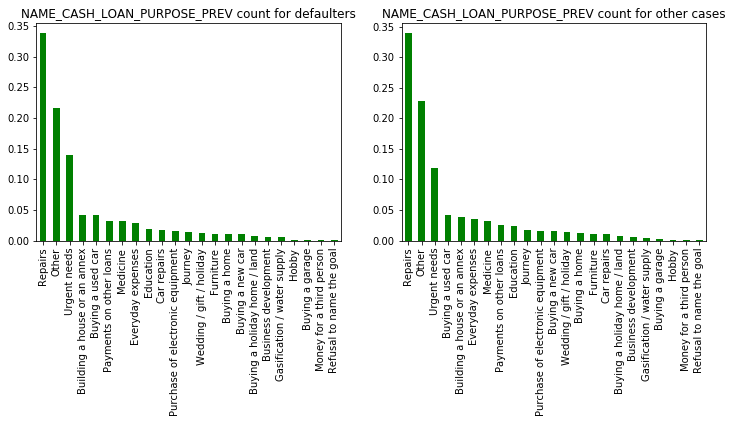

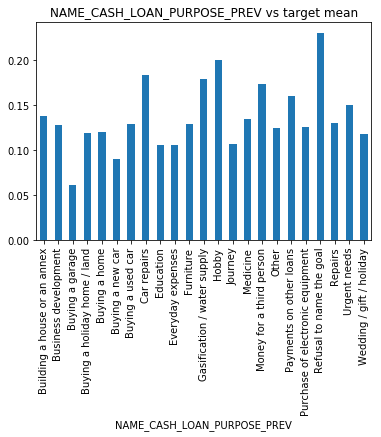

In [39]:
cat_plot(df, 'NAME_CASH_LOAN_PURPOSE_PREV')

In [40]:
#NAME_CASH_LOAN_PURPOSE_PREV
df.groupby(['NAME_CASH_LOAN_PURPOSE_PREV', 'FLAG_OWN_REALTY' ])['TARGET'].agg([ 'mean', 'count'])
pd.pivot_table(data= df, index="NAME_CASH_LOAN_PURPOSE_PREV", columns="FLAG_OWN_REALTY", values= "TARGET", aggfunc=['mean', 'count'] )

mean             count         
FLAG_OWN_REALTY                          N         Y       N        Y
NAME_CASH_LOAN_PURPOSE_PREV                                          
Building a house or an annex      0.141844  0.137079   564.0   1780.0
Business development              0.126582  0.128571    79.0    280.0
Buying a garage                   0.043478  0.064516    23.0     93.0
Buying a holiday home / land      0.076336  0.135542   131.0    332.0
Buying a home                     0.164021  0.103516   189.0    512.0
Buying a new car                  0.095420  0.088141   262.0    624.0
Buying a used car                 0.114014  0.136447   842.0   1627.0
Car repairs                       0.191710  0.180723   193.0    498.0
Education                         0.109137  0.103191   394.0    940.0
Everyday expenses                 0.111285  0.102546   638.0   1414.0
Furniture                         0.129730  0.128421   185.0    475.0
Gasification / water supply       0.246154  0.155914    65.0    186.0
Hobby                             0.300000  0.171429    10.0     35.0
Journey                           0.131737  0.094633   334.0    708.0
Medicine                          0.148069  0.129537   466.0   1405.0
Money for a third person          0.200000  0.166667     5.0     18.0
Other                             0.136248  0.120396  3523.0   9909.0
Payments on other loans           0.142857  0.166238   406.0   1167.0
Purchase of electronic equipment  0.145522  0.117117   268.0    666.0
Refusal to name the goal               NaN  0.230769     NaN     13.0
Repairs                           0.134823  0.128413  5103.0  15014.0
Urgent needs                      0.160111  0.146014  1805.0   5431.0
Wedding / gift / holiday          0.100418  0.124555   239.0    562.0

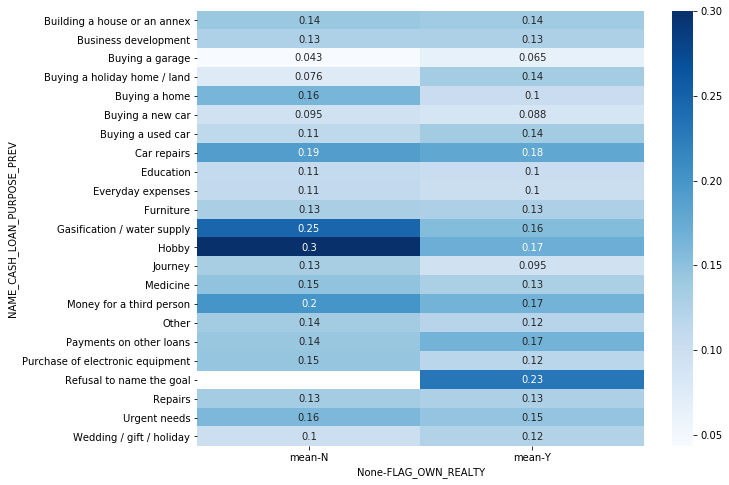

In [41]:

xyz= pd.pivot_table(data= df, index="NAME_CASH_LOAN_PURPOSE_PREV", columns="FLAG_OWN_REALTY", values= "TARGET", aggfunc=['mean'] )
plt.figure(figsize=[10,8])
sns.heatmap(xyz, annot= True, cmap= "Blues")
plt.show()

<h3>Analysis report 5</h3>
1. In column NAME_CASH_LOAN_PURPOSE_PREV, customers taking cash loan to pay other loans are high default rates, refusal to name the purpose has high default rate, since records are very few in this category relying on this is not right. 'Taking money for third party' also has high defaulters.<br>
2. If a customer own a realty and then buying house there defaulter percentage is lower compared to customers who don't own a realty. 'Urgent needs', 'Hobby' also have high defaulters compared to other categories. 

<h2>Numeric columns </h2>

In [42]:
remaining_num_cols= list(set(numeric_col)- set(possible_flag_cols))
len(remaining_num_cols)

35

In [43]:
df[remaining_num_cols].isnull().sum()*100/df.shape[0]

AMT_ANNUITY_PREV                22.631952
DEF_60_CNT_SOCIAL_CIRCLE         0.237247
AMT_REQ_CREDIT_BUREAU_MON       11.593988
AMT_REQ_CREDIT_BUREAU_YEAR      11.593988
SELLERPLACE_AREA_PREV            1.150505
AMT_GOODS_PRICE_PREV            23.492489
CNT_FAM_MEMBERS                  0.000140
AMT_REQ_CREDIT_BUREAU_DAY       11.593988
DEF_30_CNT_SOCIAL_CIRCLE         0.237247
REGION_POPULATION_RELATIVE       0.000000
AMT_CREDIT                       0.000000
DAYS_DECISION_PREV               1.150505
AMT_APPLICATION_PREV             1.150505
EXT_SOURCE_3                    17.174292
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT_PREV                  1.150575
AMT_REQ_CREDIT_BUREAU_HOUR      11.593988
DAYS_BIRTH                       0.000000
OBS_60_CNT_SOCIAL_CIRCLE         0.237247
AMT_ANNUITY                      0.006503
AMT_REQ_CREDIT_BUREAU_WEEK      11.593988
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
EXT_SOURCE_2                     0

In [44]:
days_col= [col for col in remaining_num_cols if 'DAYS' in col]
amt_col= [col for col in remaining_num_cols if 'AMT' in col]
len(days_col), len(amt_col)

(6, 14)

In [45]:
df[days_col].describe()

,DAYS_DECISION_PREV,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE
count,1.413701e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430154e+06
mean,-8.803670e+02,-1.631495e+04,-5.001275e+03,-3.034492e+03,6.860209e+04,-1.076470e+03
std,7.835402e+02,4.346737e+03,3.551626e+03,1.507182e+03,1.451967e+05,8.036988e+02
min,-2.922000e+03,-2.522900e+04,-2.467200e+04,-7.197000e+03,-1.791200e+04,-4.292000e+03
25%,-1.313000e+03,-1.997500e+04,-7.509000e+03,-4.319000e+03,-2.825000e+03,-1.678000e+03
50%,-5.820000e+02,-1.603700e+04,-4.506000e+03,-3.330000e+03,-1.277000e+03,-9.960000e+02
75%,-2.710000e+02,-1.272950e+04,-1.997000e+03,-1.783000e+03,-2.820000e+02,-3.830000e+02
max,-1.000000e+00,-7.489000e+03,0.000000e+00,0.000000e+00,3.652430e+05,0.000000e+00


In [46]:
#removing negative days 
df[days_col]= abs(df[days_col])

#converting days to years 
for col in days_col:
    df[col]= df[col].apply(lambda x: round(x/365, 2))
df[days_col].describe()

,DAYS_DECISION_PREV,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE
count,1.413701e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430154e+06
mean,2.411964e+00,4.469851e+01,1.370211e+01,8.313689e+00,1.987940e+02,2.949234e+00
std,2.146684e+00,1.190887e+01,9.730477e+00,4.129251e+00,3.924951e+02,2.201908e+00
min,0.000000e+00,2.052000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.400000e-01,3.487500e+01,5.470000e+00,4.880000e+00,2.840000e+00,1.050000e+00
50%,1.590000e+00,4.394000e+01,1.235000e+01,9.120000e+00,6.560000e+00,2.730000e+00
75%,3.600000e+00,5.473000e+01,2.057000e+01,1.183000e+01,1.726000e+01,4.600000e+00
max,8.010000e+00,6.912000e+01,6.759000e+01,1.972000e+01,1.000670e+03,1.176000e+01


In [47]:
df.groupby("TARGET")[days_col].mean() #days employed as 100+years, so using median
df.groupby("TARGET")[days_col].median()

,DAYS_DECISION_PREV,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE
TARGET,,,,,,
0,1.62,44.28,12.46,9.24,6.80,2.81
1,1.35,40.40,11.11,7.89,4.47,2.05


In [48]:
#dealing with outliers
df.DAYS_EMPLOYED.describe()

count    1.430155e+06
mean     1.987940e+02
std      3.924951e+02
min      0.000000e+00
25%      2.840000e+00
50%      6.560000e+00
75%      1.726000e+01
max      1.000670e+03
Name: DAYS_EMPLOYED, dtype: float64

In [49]:
df[df.DAYS_EMPLOYED> df.DAYS_BIRTH][['SK_ID_CURR','TARGET', 'CODE_GENDER',  'DAYS_EMPLOYED', 'DAYS_BIRTH']]

,SK_ID_CURR,TARGET,CODE_GENDER,DAYS_EMPLOYED,DAYS_BIRTH
33,100011,0,F,1000.67,55.07
34,100011,0,F,1000.67,55.07
35,100011,0,F,1000.67,55.07
36,100011,0,F,1000.67,55.07
43,100015,0,F,1000.67,55.94
...,...,...,...,...,...
1430049,456231,0,M,1000.67,63.36
1430050,456231,0,M,1000.67,63.36
1430139,456249,0,F,1000.67,66.81
1430140,456249,0,F,1000.67,66.81


<h3>Observation 3</h3>
The days employed was greater than the age, replaced all such values with NAN
Replacing that with mean, median or percentile will not ensure the value being less than age. Will not hold the integrity of the analysis 

In [50]:
#ALl these column have same number 
print(df[df.DAYS_EMPLOYED> df.DAYS_BIRTH].DAYS_EMPLOYED.mean())

#replacing with nan, if we replace with mean or median still it might be greater than the age 
df.loc[df.DAYS_EMPLOYED> df.DAYS_BIRTH, "DAYS_EMPLOYED"]= np.nan
df.DAYS_EMPLOYED.describe()  #double checking 

1000.6699999948811


count    1.153787e+06
mean     6.719654e+00
std      6.344916e+00
min      0.000000e+00
25%      2.300000e+00
50%      4.810000e+00
75%      8.920000e+00
max      4.907000e+01
Name: DAYS_EMPLOYED, dtype: float64

In [51]:
?sns.boxplot

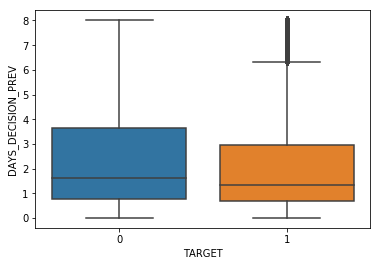

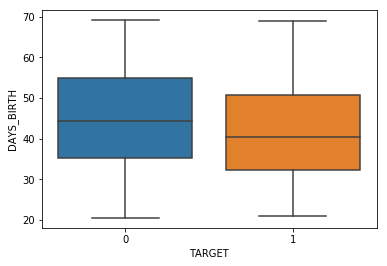

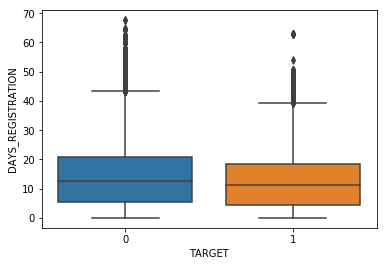

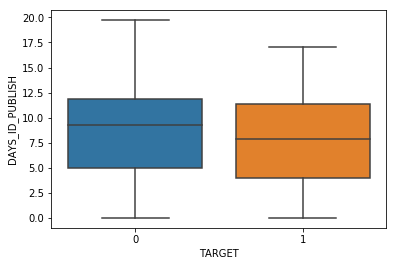

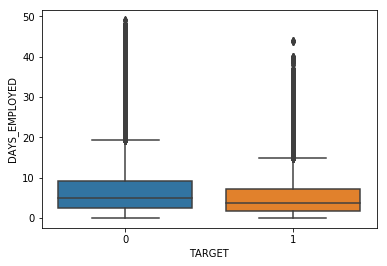

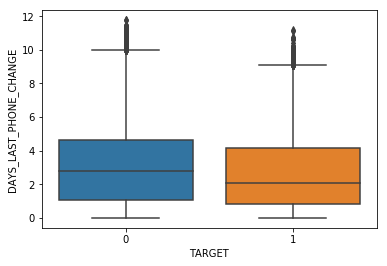

In [52]:
for col in days_col:
    sns.boxplot(data= df, x='TARGET', y=col)
    plt.show()

In [53]:
#creating age buckets
df['AGE_GROUP']=pd.cut(df['DAYS_BIRTH'],                 
                         bins=[19,25,35,45,60,100], labels=['very_young','young', 'middle_age','late_forties', 'senior_citizen'])

df.AGE_GROUP.value_counts()

late_forties      489289
middle_age        392472
young             321595
senior_citizen    186099
very_young         40700
Name: AGE_GROUP, dtype: int64

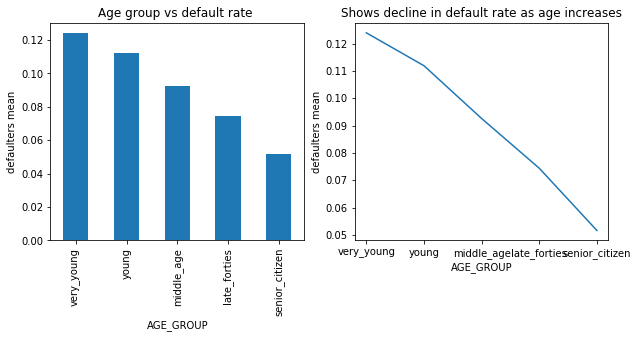

In [54]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,2)
df.groupby("AGE_GROUP").TARGET.mean().plot.line()
plt.ylabel("defaulters mean")
plt.title("Shows decline in default rate as age increases")
plt.subplot(1,2,1)
df.groupby("AGE_GROUP").TARGET.mean().plot.bar()
plt.ylabel("defaulters mean")
plt.title("Age group vs default rate ")
plt.show()

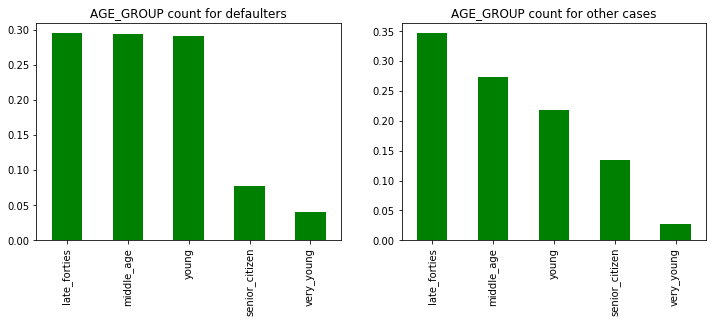

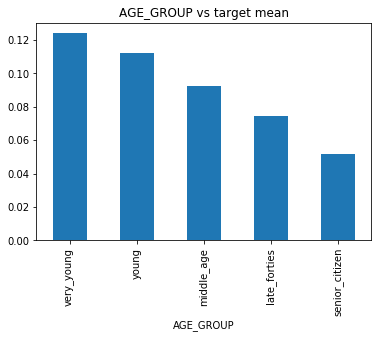

In [55]:
cat_plot(df, "AGE_GROUP")

In [56]:
#creating employed buckets
df['EMPLOYED_YEARS_GROUP']=pd.cut(df['DAYS_EMPLOYED'],                 
                         bins=[0,1,3,5,10,50], labels=['<1year','<3years', '<5years','5-10years', '>10years'])

df.EMPLOYED_YEARS_GROUP.value_counts()

5-10years    319677
<3years      267874
>10years     239244
<5years      216415
<1year       110560
Name: EMPLOYED_YEARS_GROUP, dtype: int64

In [57]:
df.groupby("EMPLOYED_YEARS_GROUP")['DAYS_EMPLOYED'].mean() #cross checking

EMPLOYED_YEARS_GROUP
<1year        0.606573
<3years       1.980453
<5years       3.958332
5-10years     7.230310
>10years     16.666953
Name: DAYS_EMPLOYED, dtype: float64

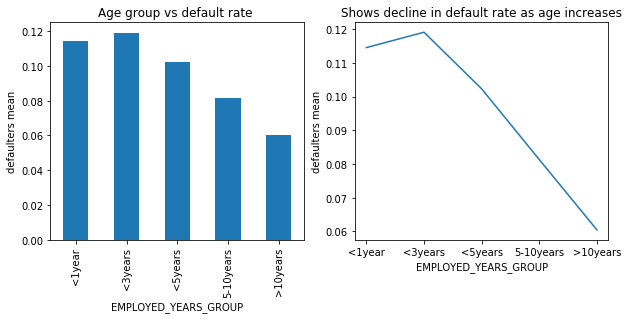

In [58]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,2)
df.groupby("EMPLOYED_YEARS_GROUP").TARGET.mean().plot.line()
plt.ylabel("defaulters mean")
plt.title("Shows decline in default rate as age increases")
plt.subplot(1,2,1)
df.groupby("EMPLOYED_YEARS_GROUP").TARGET.mean().plot.bar()
plt.ylabel("defaulters mean")
plt.title("Age group vs default rate ")
plt.show()

<h3>Analysis report 6 </h3>
1. We can see from 'DAYS_BIRTH' that the deafaulter are more younger compared to other cases<br>
2. We can visualise from 'DAYS_EMPLOYED' that the defaulters are employed for lesser years comapred to other cases.

In [59]:
amt_col

['AMT_ANNUITY_PREV',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_GOODS_PRICE_PREV',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_CREDIT',
 'AMT_APPLICATION_PREV',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_PREV',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_ANNUITY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_GOODS_PRICE']

In [60]:
df[amt_col].describe()

,AMT_ANNUITY_PREV,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_PREV,AMT_REQ_CREDIT_BUREAU_DAY,AMT_CREDIT,AMT_APPLICATION_PREV,AMT_INCOME_TOTAL,AMT_CREDIT_PREV,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT,AMT_GOODS_PRICE
count,1.106483e+06,1.264343e+06,1.264343e+06,1.094176e+06,1.264343e+06,1.430155e+06,1.413701e+06,1.430155e+06,1.413700e+06,1.264343e+06,1.430062e+06,1.264343e+06,1.264343e+06,1.428936e+06
mean,1.583718e+04,3.000080e-01,2.883232e+00,2.264512e+05,6.877880e-03,5.893386e+05,1.752436e+05,1.736036e+05,1.963541e+05,6.225368e-03,2.704203e+04,3.827838e-02,3.585135e-01,5.294435e+05
std,1.472491e+04,9.789462e-01,2.206264e+00,3.159376e+05,1.077026e-01,3.874204e+05,2.936222e+05,1.983303e+05,3.194813e+05,8.207985e-02,1.404002e+04,2.133645e-01,9.220869e-01,3.557882e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e+04,0.000000e+00,2.565000e+04,0.000000e+00,0.000000e+00,1.615500e+03,0.000000e+00,0.000000e+00,4.050000e+04
25%,6.257858e+03,0.000000e+00,1.000000e+00,4.982850e+04,0.000000e+00,2.700000e+05,1.975050e+04,1.125000e+05,2.488050e+04,0.000000e+00,1.679850e+04,0.000000e+00,0.000000e+00,2.385000e+05
50%,1.122376e+04,0.000000e+00,3.000000e+00,1.102455e+05,0.000000e+00,5.084955e+05,7.087050e+04,1.575000e+05,8.059500e+04,0.000000e+00,2.491650e+04,0.000000e+00,0.000000e+00,4.500000e+05
75%,2.042078e+04,0.000000e+00,4.000000e+00,2.295000e+05,0.000000e+00,8.086500e+05,1.800000e+05,2.115000e+05,2.156400e+05,0.000000e+00,3.457350e+04,0.000000e+00,0.000000e+00,6.795000e+05
max,4.180581e+05,2.700000e+01,2.500000e+01,5.850000e+06,9.000000e+00,4.050000e+06,5.850000e+06,1.170000e+08,4.509688e+06,4.000000e+00,2.580255e+05,8.000000e+00,2.610000e+02,4.050000e+06


In [61]:
df[amt_col].isnull().sum()*100/df.shape[0]

AMT_ANNUITY_PREV              22.631952
AMT_REQ_CREDIT_BUREAU_MON     11.593988
AMT_REQ_CREDIT_BUREAU_YEAR    11.593988
AMT_GOODS_PRICE_PREV          23.492489
AMT_REQ_CREDIT_BUREAU_DAY     11.593988
AMT_CREDIT                     0.000000
AMT_APPLICATION_PREV           1.150505
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT_PREV                1.150575
AMT_REQ_CREDIT_BUREAU_HOUR    11.593988
AMT_ANNUITY                    0.006503
AMT_REQ_CREDIT_BUREAU_WEEK    11.593988
AMT_REQ_CREDIT_BUREAU_QRT     11.593988
AMT_GOODS_PRICE                0.085236
dtype: float64

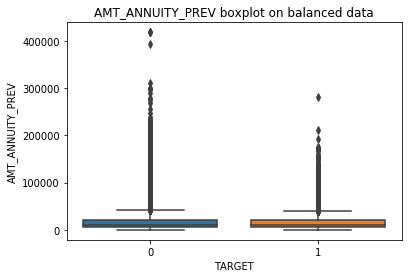

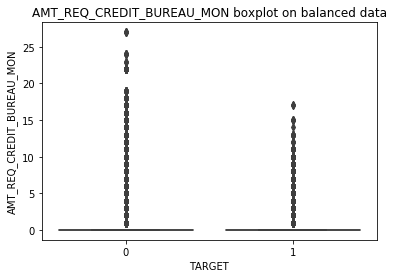

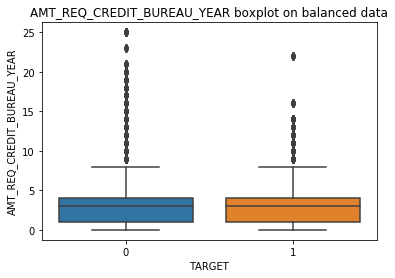

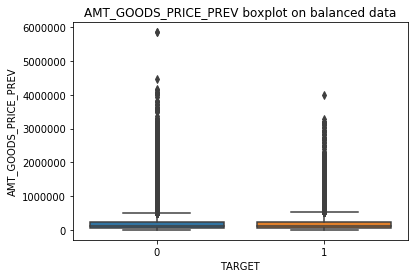

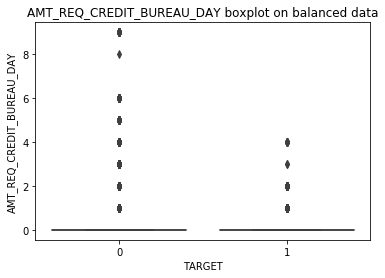

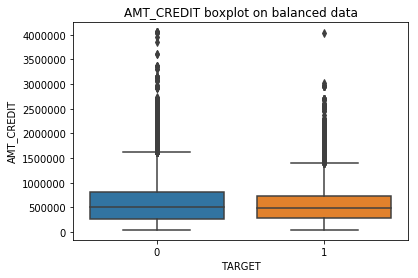

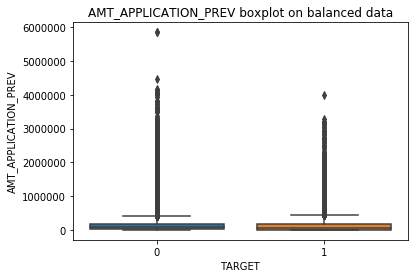

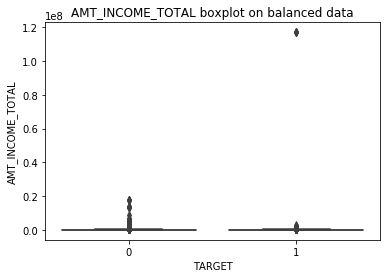

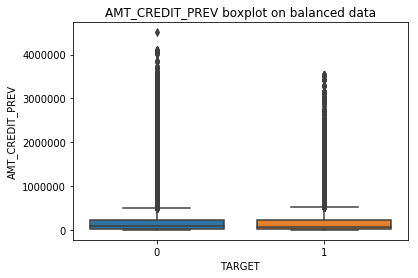

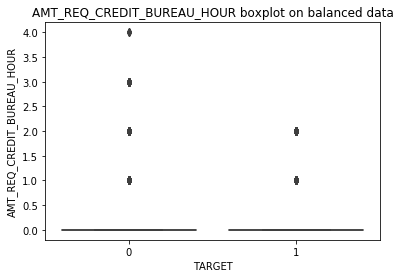

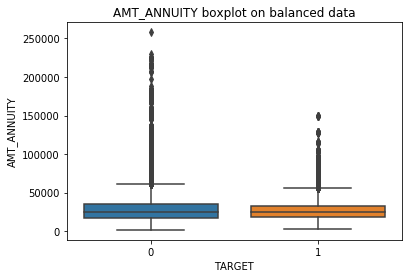

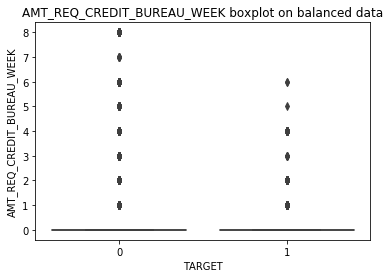

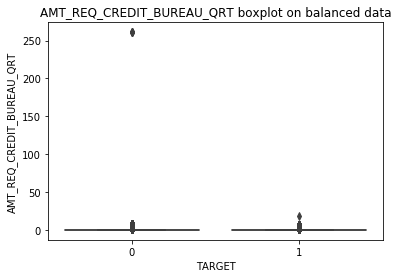

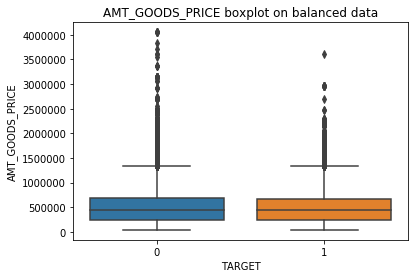

In [62]:
for col in amt_col:
    sns.boxplot(data= df, x= "TARGET", y=col)
    plt.title("{} boxplot on balanced data".format(col))
    plt.show()

<h3> Observation 4</h3>
1. Amount columns have higher variance, which is expected. Is we cannot really treat the outliers since they are hard to spot.We can create bucket these columns, and missing value would be converted into a different bucket, this can give some meaningful insights.<br>
2. Analyse number of enquiries made to credit bureau, since they are very sparce

In [63]:
credit_bureau_col= [col for col in amt_col if "AMT_REQ" in col]
credit_bureau_col

['AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT']

In [64]:
df.groupby("TARGET")[credit_bureau_col].mean()

,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT
TARGET,,,,,,
0,0.303656,2.871539,0.006719,0.006199,0.038198,0.358812
1,0.259878,3.011845,0.008627,0.006511,0.039159,0.355232


As these credit bureau columns are very sparce and does not have any insite on target variable, we can drop it 

In [65]:
print(df.shape)
df.drop(credit_bureau_col, axis=1, inplace=True)
print(df.shape)


(1430155, 89)
(1430155, 83)


Creating buckets for amount columns 

In [66]:
amt_col= list(set(amt_col)-set(credit_bureau_col))
len(amt_col)

8

In [67]:
#filling nan values with -1
for col in amt_col:
    df[col]= df[col].fillna(-1)
df[amt_col].isnull().sum()*100/df.shape[0]

AMT_ANNUITY_PREV        0.0
AMT_APPLICATION_PREV    0.0
AMT_ANNUITY             0.0
AMT_INCOME_TOTAL        0.0
AMT_GOODS_PRICE_PREV    0.0
AMT_CREDIT_PREV         0.0
AMT_GOODS_PRICE         0.0
AMT_CREDIT              0.0
dtype: float64

In [68]:
df[amt_col].describe()

,AMT_ANNUITY_PREV,AMT_APPLICATION_PREV,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE_PREV,AMT_CREDIT_PREV,AMT_GOODS_PRICE,AMT_CREDIT
count,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06
mean,1.225269e+04,1.732274e+05,2.704027e+04,1.736036e+05,1.732519e+05,1.940949e+05,5.289922e+05,5.893386e+05
std,1.454905e+04,2.925258e+05,1.404126e+04,1.983303e+05,2.925476e+05,3.183275e+05,3.559720e+05,3.874204e+05
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,2.565000e+04,-1.000000e+00,-1.000000e+00,-1.000000e+00,4.500000e+04
25%,2.250000e+03,1.764000e+04,1.679850e+04,1.125000e+05,1.764655e+04,2.333250e+04,2.385000e+05,2.700000e+05
50%,8.086320e+03,6.880050e+04,2.491650e+04,1.575000e+05,6.880050e+04,7.836750e+04,4.500000e+05,5.084955e+05
75%,1.659150e+04,1.800000e+05,3.457350e+04,2.115000e+05,1.800000e+05,2.097000e+05,6.795000e+05,8.086500e+05
max,4.180581e+05,5.850000e+06,2.580255e+05,1.170000e+08,5.850000e+06,4.509688e+06,4.050000e+06,4.050000e+06


In [69]:
df["AMT_APP_BUCKET"]=pd.cut(df['AMT_APPLICATION_PREV'], bins=[-10,-1,19000,70000,180000,450000, 7000000], labels=["NOT_AVAILABLE",'VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df.groupby("AMT_APP_BUCKET").AMT_APPLICATION_PREV.mean()

AMT_APP_BUCKET
NOT_AVAILABLE        -1.000000
VERY_LOW           1138.006566
LOW               43390.338659
MEDIUM           117354.436043
HIGH             297481.849871
VERY_HIGH        912757.761626
Name: AMT_APPLICATION_PREV, dtype: float64

In [70]:
df["AMT_GOODS_PRICE_PREV_BUCKET"]=pd.cut(df['AMT_GOODS_PRICE_PREV'], bins=[-10,-1,12000,40000,80000,190000, 7000000], labels=["NOT_AVAILABLE",'VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df["AMT_GOODS_PRICE_BUCKET"]=pd.cut(df['AMT_GOODS_PRICE'], bins=[-10,-1,120000,300000,400000,690000, 7000000], labels=["NOT_AVAILABLE",'VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df["AMT_ANNUITY_PREV_BUCKET"]=pd.cut(df['AMT_ANNUITY_PREV'], bins=[-10,-1,2300,300000,400000,690000, 7000000], labels=["NOT_AVAILABLE",'VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])


In [71]:
loop_amt_cols= list(set(amt_col) - {"AMT_INCOME_TOTAL", "AMT_CREDIT"})
loop_amt_cols

['AMT_ANNUITY_PREV',
 'AMT_APPLICATION_PREV',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE_PREV',
 'AMT_CREDIT_PREV',
 'AMT_GOODS_PRICE']

In [72]:
for col in loop_amt_cols:
    col_name= col + "_BUCKET"
    print(col_name)
    df[col_name]=pd.cut(df[col], bins=[-10,-1,np.percentile(df[col], 25),np.percentile(df[col], 50),np.percentile(df[col], 75), np.percentile(df[col], 100)], labels=["NOT_AVAILABLE",'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
    display(df.groupby(col_name)[col].mean())

AMT_ANNUITY_PREV_BUCKET


AMT_ANNUITY_PREV_BUCKET
NOT_AVAILABLE       -1.000000
LOW               2064.925933
MEDIUM            5324.744258
HIGH             11743.398445
VERY_HIGH        31811.078108
Name: AMT_ANNUITY_PREV, dtype: float64

AMT_APPLICATION_PREV_BUCKET


AMT_APPLICATION_PREV_BUCKET
NOT_AVAILABLE        -1.000000
LOW                 726.477960
MEDIUM            42459.013932
HIGH             116709.055965
VERY_HIGH        540583.014666
Name: AMT_APPLICATION_PREV, dtype: float64

AMT_ANNUITY_BUCKET


AMT_ANNUITY_BUCKET
NOT_AVAILABLE       -1.000000
LOW              11971.669673
MEDIUM           20977.569996
HIGH             29227.145449
VERY_HIGH        46006.304779
Name: AMT_ANNUITY, dtype: float64

AMT_GOODS_PRICE_PREV_BUCKET


AMT_GOODS_PRICE_PREV_BUCKET
NOT_AVAILABLE        -1.000000
LOW               11495.218771
MEDIUM            42458.942641
HIGH             116707.926861
VERY_HIGH        540630.673542
Name: AMT_GOODS_PRICE_PREV, dtype: float64

AMT_CREDIT_PREV_BUCKET


AMT_CREDIT_PREV_BUCKET
NOT_AVAILABLE        -1.000000
LOW                3541.612771
MEDIUM            48035.845522
HIGH             129965.878079
VERY_HIGH        595275.367642
Name: AMT_CREDIT_PREV, dtype: float64

AMT_GOODS_PRICE_BUCKET


AMT_GOODS_PRICE_BUCKET
NOT_AVAILABLE   -1.000000e+00
LOW              1.781947e+05
MEDIUM           3.603518e+05
HIGH             5.768756e+05
VERY_HIGH        1.036981e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [73]:
#quantile cut for zero nan columns, without imputation 
df["AMT_INCOME_TOTAL_BUCKET"]= pd.qcut(df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df["AMT_CREDIT_BUCKET"]= pd.qcut(df.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])

In [74]:
amt_col_bucket= [col+"_BUCKET" for col in amt_col]
len(amt_col_bucket), len(amt_col)

(8, 8)

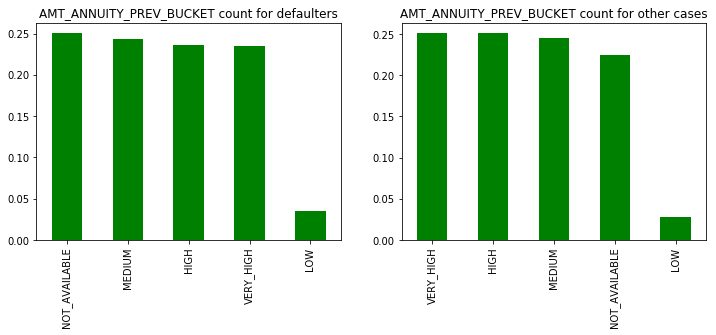

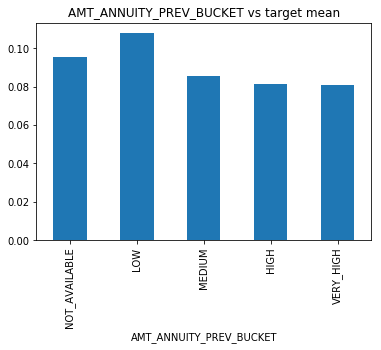

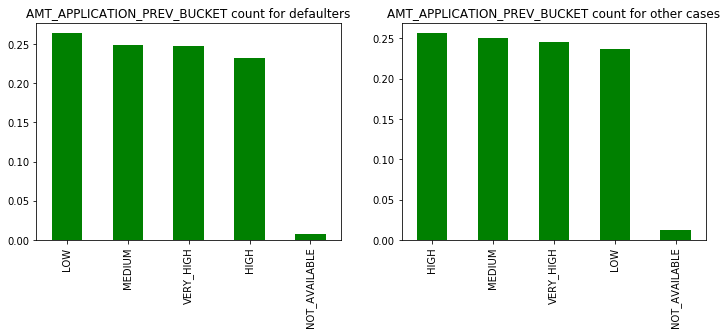

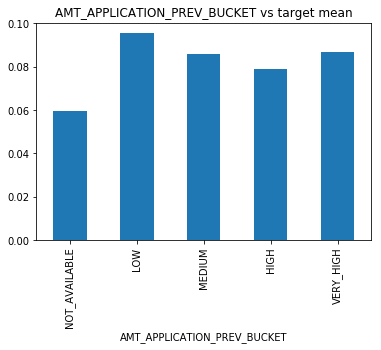

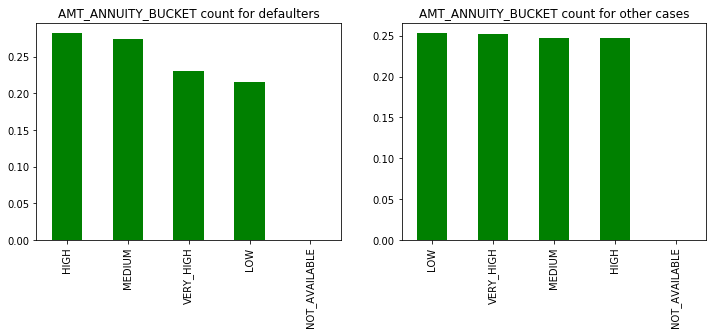

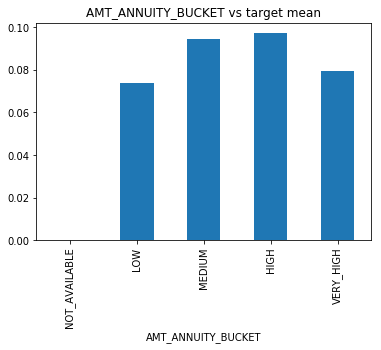

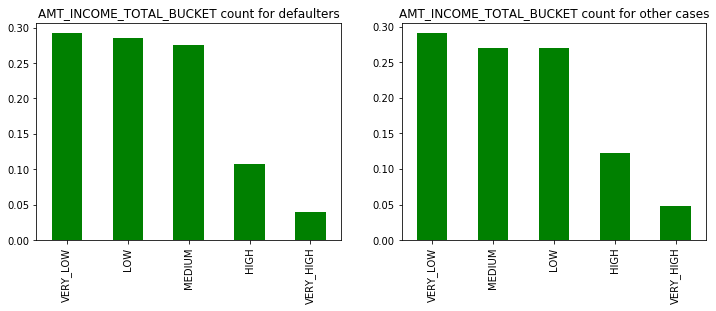

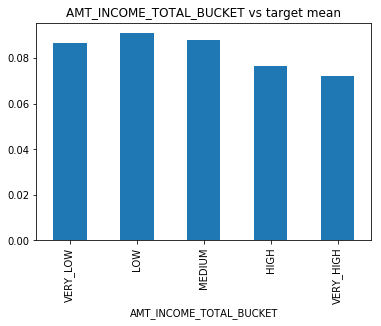

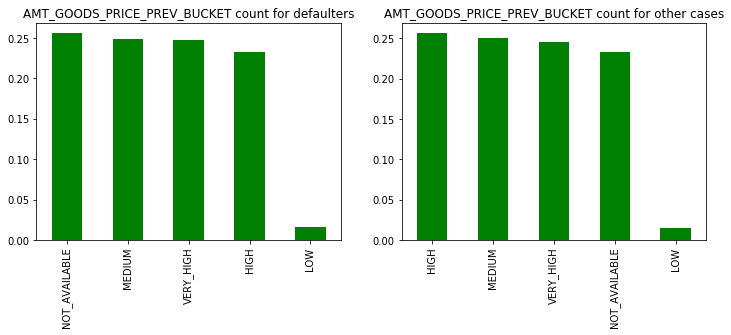

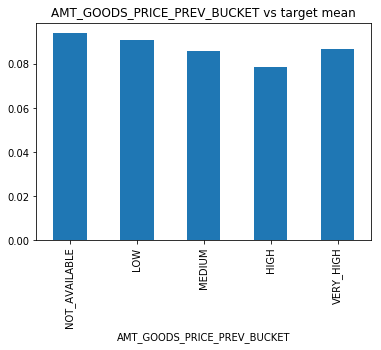

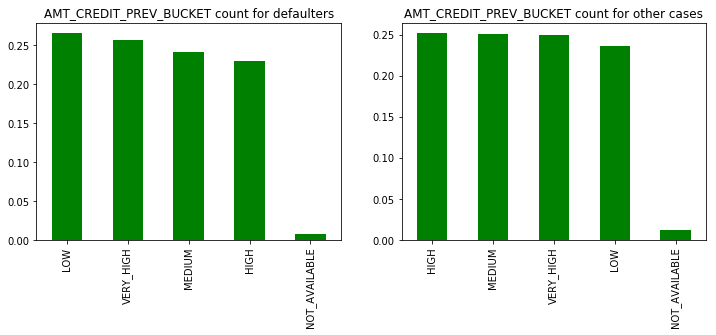

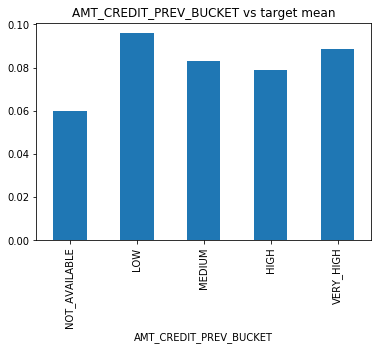

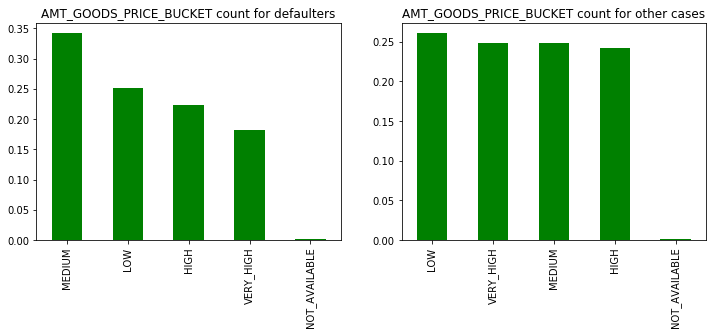

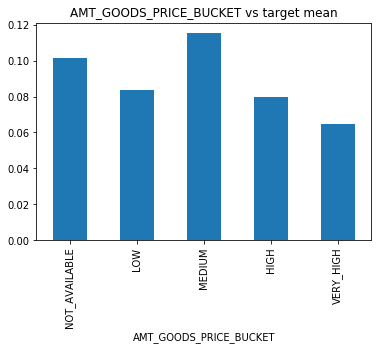

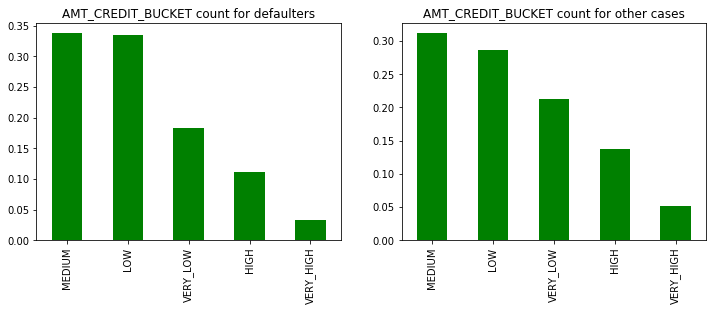

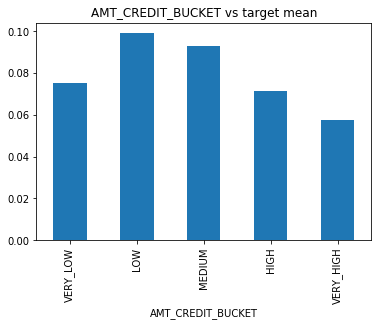

In [75]:
for col in amt_col_bucket:
#     (df.groupby(col).TARGET.mean()).plot.bar()
#     plt.show()
    cat_plot(df, col)

<h3> Analysis report 7 </h3>
1. If the goods amount is not mentioned both in previous and current application, the defaulters rate is higher. <br>
2. Income total the rate of defaulters decreases as the income increases<br>
3. Both previous and current application, low and medium credits has high defaulters

In [76]:
remaining_num_cols_2= list(set(remaining_num_cols)- set(amt_col + credit_bureau_col + days_col))
len(remaining_num_cols_2), remaining_num_cols_2

(15,
 ['SK_ID_PREV_PREV',
  'OBS_60_CNT_SOCIAL_CIRCLE',
  'HOUR_APPR_PROCESS_START_PREV',
  'CNT_CHILDREN',
  'DEF_60_CNT_SOCIAL_CIRCLE',
  'EXT_SOURCE_3',
  'OBS_30_CNT_SOCIAL_CIRCLE',
  'CNT_PAYMENT_PREV',
  'SELLERPLACE_AREA_PREV',
  'HOUR_APPR_PROCESS_START',
  'CNT_FAM_MEMBERS',
  'DEF_30_CNT_SOCIAL_CIRCLE',
  'REGION_POPULATION_RELATIVE',
  'EXT_SOURCE_2',
  'SK_ID_CURR'])

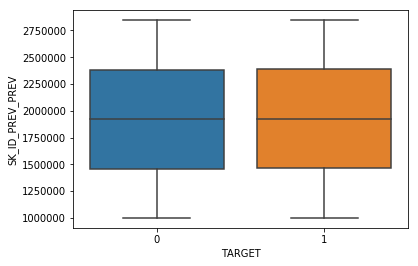

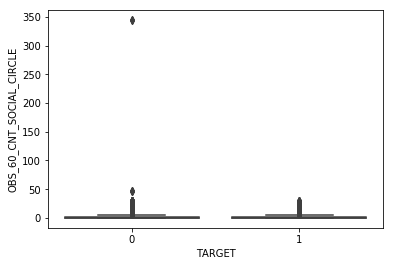

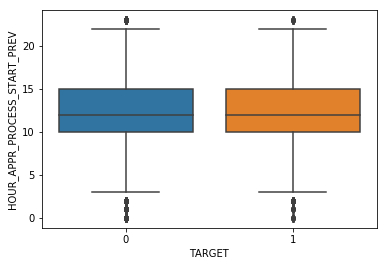

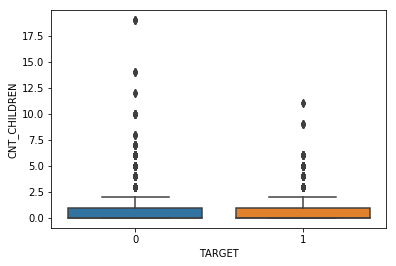

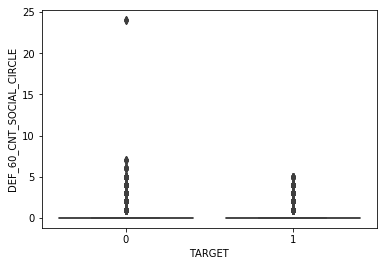

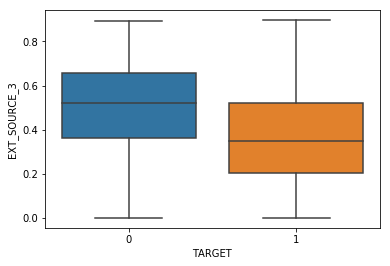

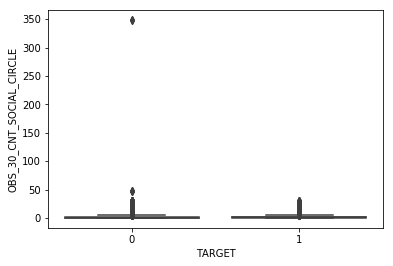

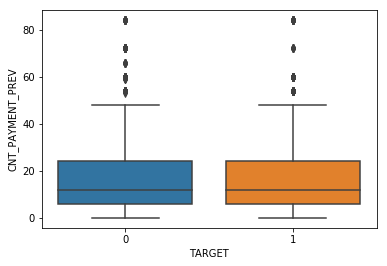

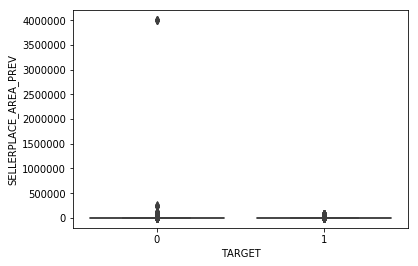

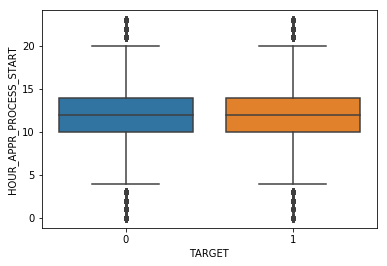

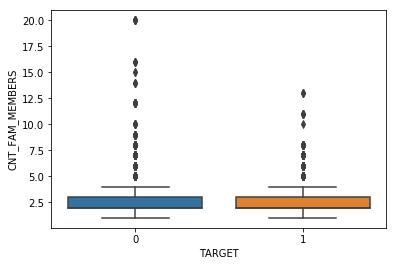

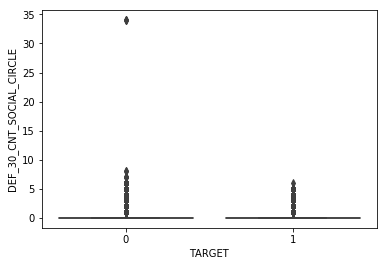

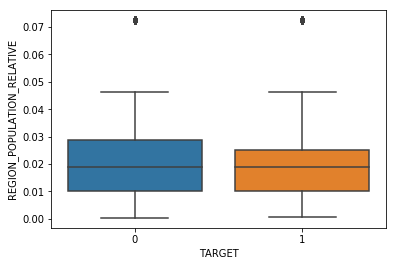

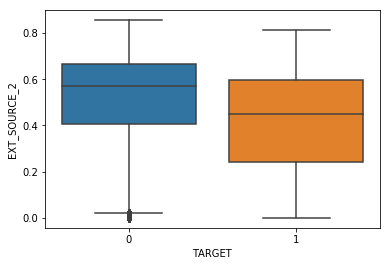

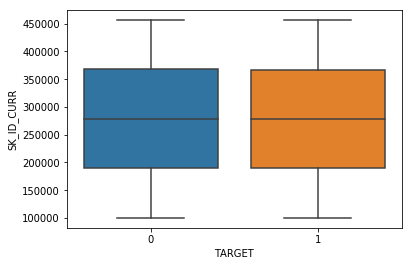

In [77]:
for col in remaining_num_cols_2:
    sns.boxplot(data= df, x='TARGET', y=col)
    plt.show()

Removing HOUR_APPR_PROCESS_START, HOUR_APPR_PROCESS_START_PREV, CNT_PAYMENT_PREV

In [78]:
print(df.shape)
df.drop(["HOUR_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START_PREV", "CNT_PAYMENT_PREV"], axis=1, inplace=True)
print(df.shape)


(1430155, 92)
(1430155, 89)


In [79]:
remaining_num_cols_3= list(set(remaining_num_cols_2)- set(["HOUR_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START_PREV", "CNT_PAYMENT_PREV"]))
len(remaining_num_cols_3)

12

In [80]:
df[remaining_num_cols_3].isnull().sum()*100/df.shape[0]

SK_ID_PREV_PREV                1.150505
OBS_60_CNT_SOCIAL_CIRCLE       0.237247
CNT_CHILDREN                   0.000000
DEF_60_CNT_SOCIAL_CIRCLE       0.237247
EXT_SOURCE_3                  17.174292
OBS_30_CNT_SOCIAL_CIRCLE       0.237247
SELLERPLACE_AREA_PREV          1.150505
CNT_FAM_MEMBERS                0.000140
DEF_30_CNT_SOCIAL_CIRCLE       0.237247
REGION_POPULATION_RELATIVE     0.000000
EXT_SOURCE_2                   0.132923
SK_ID_CURR                     0.000000
dtype: float64

count    1.430155e+06
mean     4.038870e-01
std      7.165176e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.900000e+01
Name: CNT_CHILDREN, dtype: float64

4.0


'printing max value after capping '

5

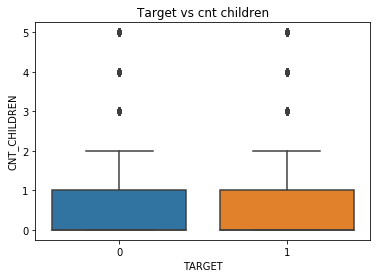

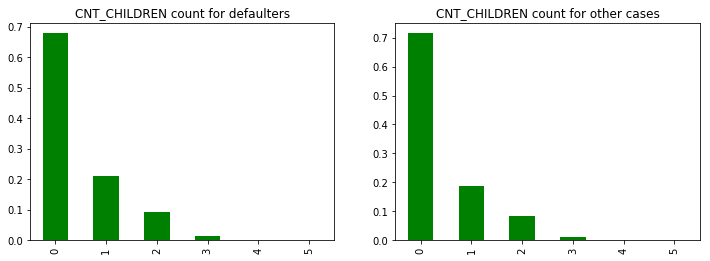

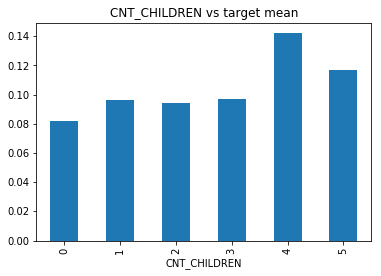

In [81]:
#capping outliers in cnt_children 
display(df.CNT_CHILDREN.describe())
print(np.percentile(df.CNT_CHILDREN, 99.9)) #capping this to 5 to include some extreme cases 

df.loc[df.CNT_CHILDREN>5, 'CNT_CHILDREN']= 5 #cappimg values to 5
display("printing max value after capping ",df.CNT_CHILDREN.max()) #cross checking 

sns.boxplot(data= df, x='TARGET', y='CNT_CHILDREN')
plt.title("Target vs cnt children")
plt.show()

# df.groupby("TARGET").CNT_CHILDREN.mean()
# df.groupby("CNT_CHILDREN").TARGET.mean().plot.bar()
# plt.title("NUmber of children vs the mean of target on \n balanced data")
# plt.show()
cat_plot(df, 'CNT_CHILDREN')

In [82]:
children_income= pd.pivot_table(data= df, index= "AMT_INCOME_TOTAL_BUCKET", columns= "CNT_CHILDREN", values= "TARGET")
children_income

CNT_CHILDREN,0,1,2,3,4,5
AMT_INCOME_TOTAL_BUCKET,,,,,,
VERY_LOW,0.080054,0.104789,0.102261,0.096651,0.165862,0.152466
LOW,0.086708,0.102721,0.095343,0.116950,0.132911,0.076923
MEDIUM,0.084543,0.095907,0.095773,0.097272,0.147273,0.106061
HIGH,0.074800,0.079267,0.083105,0.082382,0.104294,0.116883
VERY_HIGH,0.076298,0.062248,0.067215,0.048417,0.085271,0.066667


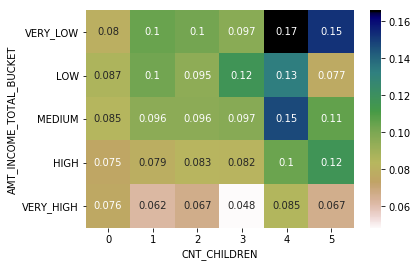

In [83]:
sns.heatmap(children_income, annot= True, cmap='gist_earth_r')

<h3> Analysis report 8 </h3>
1. CNT_CHILDREN column is insightful, we can see that as number of children increases the default rate increases.<br>
2. Analysis CNT_CHILDREN with INCOME_BUCKETS, low customers with low income and have many children are likly to be defaulters, as we can visualise on the top right of the heat map

from boxplots Ext_source_3 shows some variantion between the Traget, let us analyse futhur

In [84]:
df.EXT_SOURCE_3.describe()

count    1.184536e+06
mean     4.900486e-01
std      1.965405e-01
min      5.272652e-04
25%      3.441550e-01
50%      5.100895e-01
75%      6.496203e-01
max      8.960095e-01
Name: EXT_SOURCE_3, dtype: float64

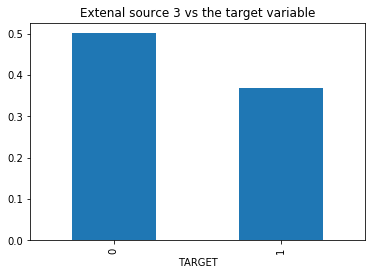

In [85]:
df.groupby("TARGET").EXT_SOURCE_3.mean().plot.bar()
plt.title("Extenal source 3 vs the target variable")
plt.show()

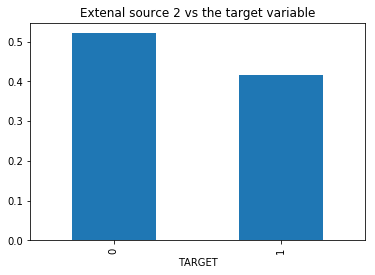

In [86]:
df.groupby("TARGET").EXT_SOURCE_2.mean().plot.bar()
plt.title("Extenal source 2 vs the target variable")
plt.show()

<h3>Analysis report 9</h3>
External source data if the normalised value is less then the default rate is more.

<h2> Bi-variant analysis </h2>

In [87]:
pd.pivot_table(df, columns="AMT_GOODS_PRICE_PREV_BUCKET", index="NAME_GOODS_CATEGORY_PREV", values= "TARGET", aggfunc=['mean', 'count'])

mean                                \
AMT_GOODS_PRICE_PREV_BUCKET NOT_AVAILABLE       LOW    MEDIUM      HIGH   
NAME_GOODS_CATEGORY_PREV                                                  
Additional Service                    NaN       NaN  0.074074  0.021277   
Animals                               NaN       NaN       NaN  0.000000   
Audio/Video                           NaN  0.095472  0.085600  0.071261   
Auto Accessories                      NaN  0.108808  0.088550  0.092676   
Clothing and Accessories              NaN  0.104603  0.072436  0.054171   
Computers                             NaN  0.130354  0.087697  0.078619   
Construction Materials                NaN  0.100457  0.072933  0.066297   
Consumer Electronics                  NaN  0.075495  0.073211  0.068907   
Direct Sales                          NaN       NaN  0.027778  0.101010   
Education                             NaN       NaN  0.083333  0.028571   
Fitness                               NaN       NaN  0.035714  0.060976   
Furniture                             NaN  0.067568  0.066650  0.058744   
Gardening                             NaN  0.108108  0.069075  0.064088   
Homewares                             NaN  0.051282  0.075521  0.067442   
Insurance                             NaN  0.000000  0.121212  0.050000   
Jewelry                               NaN  0.113043  0.093123  0.087139   
Medical Supplies                      NaN  0.000000  0.058252  0.054244   
Medicine                              NaN  0.000000  0.058333  0.061728   
Mobile                                NaN  0.093293  0.087120  0.082110   
Office Appliances                     NaN  0.063380  0.084609  0.085185   
Other                                 NaN  0.039370  0.065046  0.051852   
Photo / Cinema Equipment              NaN  0.081967  0.081168  0.065963   
Sport and Leisure                     NaN  0.068702  0.075704  0.067982   
Tourism                               NaN  0.000000  0.075000  0.054726   
Vehicles                              NaN  0.000000  0.098182  0.104972   
Weapon                                NaN  0.000000  0.095238  0.064516   
XNA                              0.095814  0.091014  0.098792  0.092647   

                                              count                    \
AMT_GOODS_PRICE_PREV_BUCKET VERY_HIGH NOT_AVAILABLE     LOW    MEDIUM   
NAME_GOODS_CATEGORY_PREV                                                
Additional Service           0.114286           NaN     NaN      27.0   
Animals                           NaN           NaN     NaN       NaN   
Audio/Video                  0.067397           NaN  1833.0   31729.0   
Auto Accessories             0.089416           NaN   193.0    3275.0   
Clothing and Accessories     0.051150           NaN   239.0    3617.0   
Computers                    0.079936           NaN   537.0   20092.0   
Construction Materials       0.070281           NaN   219.0    6458.0   
Consumer Electronics         0.065576           NaN  2477.0   45253.0   
Direct Sales                 0.082051           NaN     NaN      36.0   
Education                    0.071429           NaN     NaN      12.0   
Fitness                      0.000000           NaN     NaN      56.0   
Furniture                    0.047891           NaN   222.0   12258.0   
Gardening                    0.066059           NaN    37.0     941.0   
Homewares                    0.058131           NaN    78.0    1152.0   
Insurance                    0.500000           NaN     3.0      33.0   
Jewelry                      0.079787           NaN   115.0    2792.0   
Medical Supplies             0.059880           NaN     2.0     412.0   
Medicine                     0.062331           NaN     3.0     120.0   
Mobile                       0.079755           NaN  8618.0  149610.0   
Office Appliances            0.064516           NaN   142.0    1241.0   
Other                        0.022059           NaN   127.0    1399.0   
Photo / Cinema Equipment     0.056

In [88]:
df.TARGET.mean()

0.08624240029926826

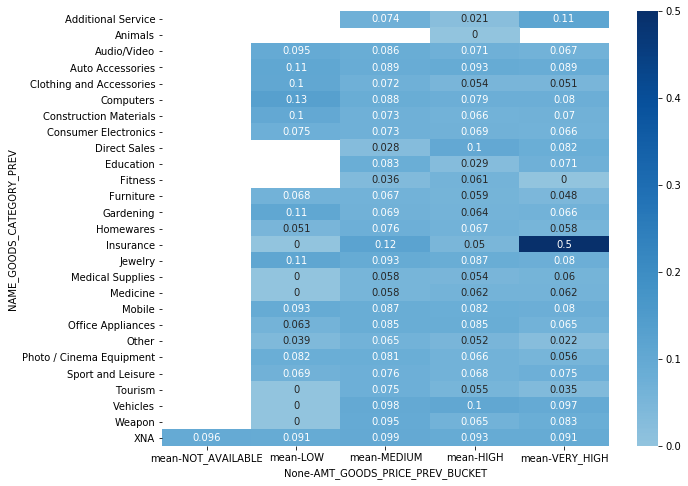

In [89]:
goods_price_type= pd.pivot_table(df, columns="AMT_GOODS_PRICE_PREV_BUCKET", index="NAME_GOODS_CATEGORY_PREV", values= "TARGET", aggfunc=['mean'])

plt.figure(figsize=[10,8])

sns.heatmap(goods_price_type, center= 0.08, cmap= "Blues", annot= True)
plt.show()

<h4> Observation 5</h4>
1. We can observe that there is high correlation for some categories in NAME_GOODS_CATEGORY_PREV and AMT_GOODS_PRICE_PREV_BUCKET but the number of records in this categories are less. So its good to keep a check at these findings but not enough to make a decision.

In [90]:

pd.pivot_table(data= df, index= "OCCUPATION_TYPE", columns= "AMT_INCOME_TOTAL_BUCKET", values= "TARGET", aggfunc=['mean', 'count'])

mean                                          \
AMT_INCOME_TOTAL_BUCKET  VERY_LOW       LOW    MEDIUM      HIGH VERY_HIGH   
OCCUPATION_TYPE                                                             
Accountants              0.058544  0.060878  0.063310  0.032810  0.072042   
Cleaning staff           0.099581  0.085192  0.084410  0.090782  0.138235   
Cooking staff            0.115119  0.113042  0.104550  0.083105  0.049536   
Core staff               0.073866  0.076424  0.063642  0.058002  0.044342   
Drivers                  0.123109  0.126655  0.123471  0.105156  0.099164   
HR staff                 0.087282  0.059854  0.065409  0.117264  0.057803   
High skill tech staff    0.084047  0.076583  0.064974  0.054424  0.047091   
IT staff                 0.063452  0.098522  0.075758  0.042484  0.019737   
Laborers                 0.110638  0.111481  0.117763  0.102367  0.097764   
Low-skill Laborers       0.178715  0.213060  0.174091  0.220721  0.000000   
Managers                 0.079455  0.070344  0.068309  0.066964  0.076561   
Medicine staff           0.086963  0.076477  0.066815  0.045929  0.087786   
Private service staff    0.064275  0.087574  0.061054  0.049555  0.005161   
Realty agents            0.101399  0.090909  0.097245  0.083665  0.230769   
Sales staff              0.100045  0.100362  0.098525  0.098848  0.092732   
Secretaries              0.081781  0.079232  0.078325  0.060852  0.135371   
Security staff           0.131334  0.122760  0.098965  0.098513  0.099164   
Waiters/barmen staff     0.078458  0.116657  0.111327  0.250526  0.029412   

                           count                                 
AMT_INCOME_TOTAL_BUCKET VERY_LOW    LOW MEDIUM   HIGH VERY_HIGH  
OCCUPATION_TYPE                                                  
Accountants                 8216  10595  12889   7650      3262  
Cleaning staff             10735   6996   4952   1432       340  
Cooking staff              11727   8457   6198   2190       323  
Core staff                 32505  33118  33563  14896      6089  
Drivers                    12956  23181  30242  14255      4306  
HR staff                     401    685    795    307       173  
High skill tech staff      10982  12875  14852   7754      2888  
IT staff                     394    406    528    306       152  
Laborers                   65746  75932  75771  29111      7201  
Low-skill Laborers          3984   2971   1953    444        30  
Managers                    8445  15879  30289  23789     18260  
Medicine staff             14512  11036   9893   3832      1048  
Private service staff       2676   3380   3718   1796       775  
Realty agents                572    836   1234    753       182  
Sales staff                51517  43941  38792  14234      4389  
Secretaries                 1932   1666   1481    493       229  
Security staff             10835   9376   8215   2690       837  
Waiters/barmen staff        2205   1783   1545    475       170

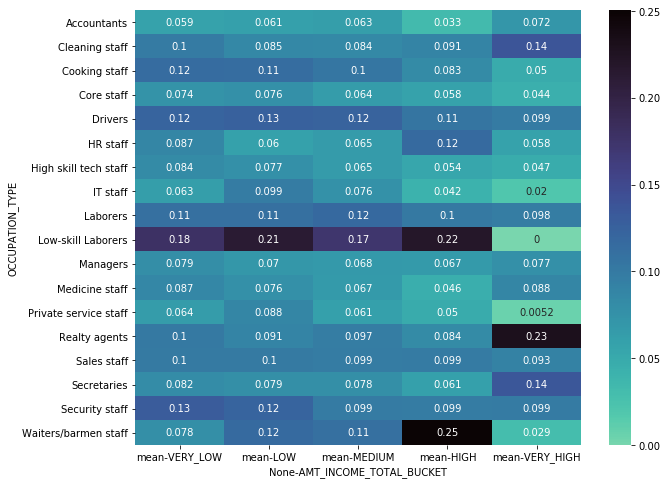

In [91]:
organ_income_type= pd.pivot_table(df, columns="AMT_INCOME_TOTAL_BUCKET", index="OCCUPATION_TYPE", values= "TARGET", aggfunc=['mean'])

plt.figure(figsize=[10,8])



sns.heatmap(organ_income_type, center=0.1, cmap= "mako_r", annot= True)
plt.show()

<h3> Analysis report 10 </h3>
Univariant analysis on ORGANIZATION_TYPE gave few insights, that low_skill_laboures have high defaulters and INCOME_BUCKET showes there are more deafulters as the Income reduces. Analysis these two variables together has given more insights. <br>
1. 'Waiters/barmen' with high salary have more default rate <br>
2. 'Realty agents' with very high salary have higher rate deafault rate 

In [92]:

pd.pivot_table(data= df, columns= "NAME_CONTRACT_STATUS_PREV", index= "NAME_CASH_LOAN_PURPOSE_PREV", values= "TARGET", aggfunc=['mean', 'count'])

mean                                   \
NAME_CONTRACT_STATUS_PREV         Approved  Canceled   Refused Unused offer   
NAME_CASH_LOAN_PURPOSE_PREV                                                   
Building a house or an annex      0.122896  0.081395  0.146635          NaN   
Business development              0.082569  0.142857  0.148305          NaN   
Buying a garage                   0.096774  0.142857  0.038462          NaN   
Buying a holiday home / land      0.095652  0.066667  0.129129          NaN   
Buying a home                     0.096386  0.096774  0.128968          NaN   
Buying a new car                  0.082051  0.113636  0.090484     0.166667   
Buying a used car                 0.106040  0.109756  0.140491     0.083333   
Car repairs                       0.165563  0.200000  0.197861          NaN   
Education                         0.092736  0.052632  0.117647     0.200000   
Everyday expenses                 0.078598  0.076923  0.134995     0.100000   
Furniture                         0.075862  0.210526  0.168091          NaN   
Gasification / water supply       0.130000  0.000000  0.217687          NaN   
Hobby                             0.187500       NaN  0.206897          NaN   
Journey                           0.088608  0.062500  0.124088     0.000000   
Medicine                          0.126966  0.185185  0.138947     0.250000   
Money for a third person          0.000000       NaN  0.333333          NaN   
Other                             0.104979  0.138211  0.139244     0.136364   
Payments on other loans           0.151394  0.109375  0.164143     0.333333   
Purchase of electronic equipment  0.100580  0.285714  0.155172     0.000000   
Refusal to name the goal          0.333333       NaN  0.200000          NaN   
Repairs                           0.113325  0.094877  0.141919     0.054054   
Urgent needs                      0.135266  0.078261  0.162600          NaN   
Wedding / gift / holiday          0.121662  0.055556  0.116592          NaN   

                                    count                                 
NAME_CONTRACT_STATUS_PREV        Approved Canceled  Refused Unused offer  
NAME_CASH_LOAN_PURPOSE_PREV                                               
Building a house or an annex        594.0     86.0   1664.0          NaN  
Business development                109.0     14.0    236.0          NaN  
Buying a garage                      31.0      7.0     78.0          NaN  
Buying a holiday home / land        115.0     15.0    333.0          NaN  
Buying a home                       166.0     31.0    504.0          NaN  
Buying a new car                    195.0     44.0    641.0          6.0  
Buying a used car                   745.0     82.0   1630.0         12.0  
Car repairs                         302.0     15.0    374.0          NaN  
Education                           647.0     19.0    663.0          5.0  
Everyday expenses                  1056.0     13.0    963.0         20.0  
Furniture                           290.0     19.0    351.0          NaN  
Gasification / water supply         100.0      4.0    147.0          NaN  
Hobby                                16.0      NaN     29.0          NaN  
Journey                             474.0     16.0    548.0          4.0  
Medicine                            890.0     27.0    950.0          4.0  
Money for a third person             11.0      NaN     12.0          NaN  
Other                              5744.0    246.0   7354.0         88.0  
Payments on other loans             251.0     64.0   1255.0          3.0  
Purchase of electronic equipment    517.0      7.0    406.0          4.0  
Refusal to name the goal              3.0      NaN     10.0          NaN  
Repairs                            7377.0    527.0  12176.0         37.0  
Urgent needs                       3105.0    115.0   4016.0          NaN  
Wedding / gift / holiday            337.0     18.0    446.0          NaN

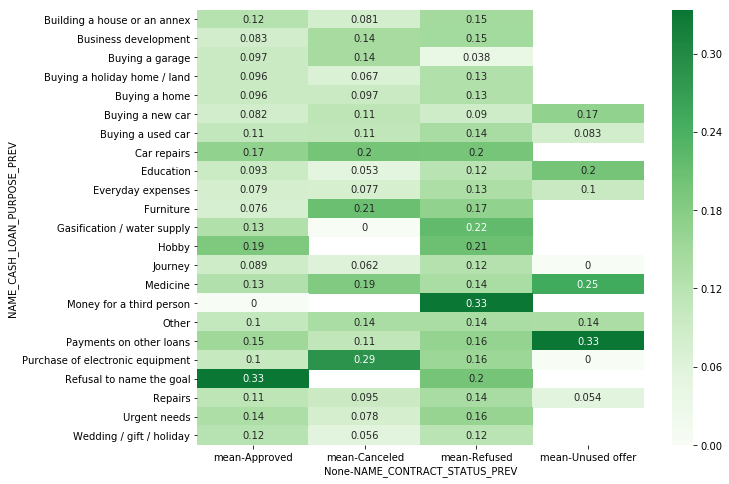

In [93]:
loan_status_type= pd.pivot_table(df, columns="NAME_CONTRACT_STATUS_PREV", index="NAME_CASH_LOAN_PURPOSE_PREV", values= "TARGET", aggfunc=['mean'])

plt.figure(figsize=[10,8])



sns.heatmap(loan_status_type, center=0.2, cmap= "Greens", annot= True)
plt.show()

<h3>Analysis report 11</h3>
Analyising NAME_CASH_LOAN_PURPOSE_PREV along with NAME_CONTRACT_STATUS_PREV gives more insight. Now 'Medicine', 'hobbies' and 'gassification/water supply' shows some high default rate. <br>
1. 'Medicine' generally have a higher value but under previously 'canceled' and 'unused' offers have high default rate but since the records are few its not made this a important deciding factor.<br>
2. 'Hobby' has highest deafault rate for previously 'Approved' loans, it has high default rate<br>
3. 'gassification/water supply' generally have high values as high under 'approved' and high under 'Refused'<br>

In [94]:
?plt.scatter

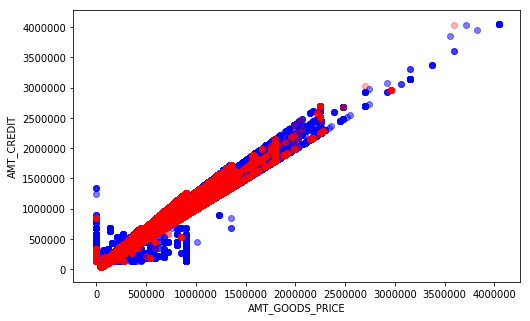

In [95]:
#df.AMT_GOODS_PRICE, df.AMT_CREDIT
plt.figure(figsize=[8,5])

plt.scatter(df[df.TARGET==0].AMT_GOODS_PRICE, df[df.TARGET==0].AMT_CREDIT, c= "blue", alpha=0.5)
plt.scatter(df[df.TARGET==1].AMT_GOODS_PRICE, df[df.TARGET==1].AMT_CREDIT, c= "red", alpha= 0.3)
plt.xlabel("AMT_GOODS_PRICE")
plt.ylabel("AMT_CREDIT")
plt.show()

In [96]:
df[(df.AMT_CREDIT>2500000)].TARGET.value_counts()

0    734
1     42
Name: TARGET, dtype: int64

<h3> Analysis report 12 </h3>
1. For AMT Credit more than 2500000 the number of defaulters reduced by more than 10 times. 

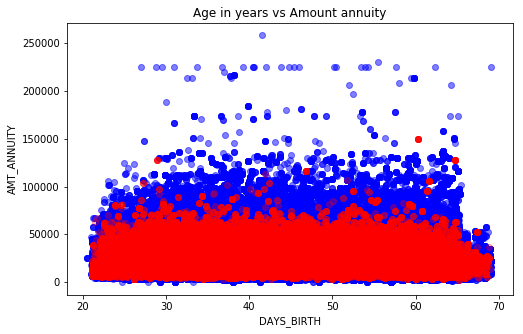

In [97]:
plt.figure(figsize=[8,5])
plt.scatter(df[df.TARGET==0].DAYS_BIRTH, df[df.TARGET==0].AMT_ANNUITY, c= "blue", alpha=0.5)
plt.scatter(df[df.TARGET==1].DAYS_BIRTH, df[df.TARGET==1].AMT_ANNUITY, c= "red", alpha= 0.3)
plt.title("Age in years vs Amount annuity")
plt.xlabel("DAYS_BIRTH")
plt.ylabel("AMT_ANNUITY")
plt.show()

In [98]:
df[(df.AMT_ANNUITY>15000)].groupby("TARGET").AMT_ANNUITY.mean()

TARGET
0    31145.962447
1    29852.937556
Name: AMT_ANNUITY, dtype: float64

In [99]:
df[(df.AMT_ANNUITY>15000)]["TARGET"].value_counts()

0    1043804
1     102476
Name: TARGET, dtype: int64

In [100]:
#df.AGE_GROUP
#df.groupby(by=["AMT_ANNUITY_BUCKET","AGE_GROUP"] ).TARGET.mean()
pd.pivot_table(data=df, columns="AGE_GROUP", index="AMT_ANNUITY_BUCKET", values= "TARGET")

AGE_GROUP,very_young,young,middle_age,late_forties,senior_citizen
AMT_ANNUITY_BUCKET,,,,,
NOT_AVAILABLE,0.000000,0.000000,0.000000,0.000000,NaN
LOW,0.105706,0.091785,0.084075,0.064526,0.047651
MEDIUM,0.142914,0.125236,0.102571,0.080863,0.054545
HIGH,0.136230,0.129295,0.102475,0.080014,0.057743
VERY_HIGH,0.122789,0.100090,0.081054,0.071472,0.047775


<h3> Analysis report 13 </h3>
1. Young and Middle age for low annuity has more default rate. Seniors have low default rate for all annuity buckets.<br>
2. For Annuity more than 15000, defaulters are very few almost 10 times lesser.

In [101]:

age_income= pd.pivot_table(data= df, columns= "AMT_INCOME_TOTAL_BUCKET", index= "AGE_GROUP", values= "TARGET")
age_income

AMT_INCOME_TOTAL_BUCKET,VERY_LOW,LOW,MEDIUM,HIGH,VERY_HIGH
AGE_GROUP,,,,,
very_young,0.129874,0.140518,0.107191,0.079501,0.088496
young,0.123717,0.115721,0.110174,0.088131,0.086432
middle_age,0.093679,0.101880,0.094580,0.078797,0.067788
late_forties,0.072895,0.073283,0.077822,0.072534,0.074252
senior_citizen,0.050971,0.054641,0.048722,0.056351,0.037756


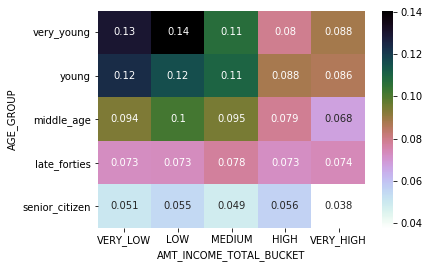

In [102]:
sns.heatmap(age_income, annot= True, cmap= "cubehelix_r")